In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

import os

pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('../data/state_unemployment.csv')
data['filed_week_ended'] = pd.to_datetime(data['filed_week_ended'])
data['reflecting_week_ended'] = pd.to_datetime(data['reflecting_week_ended'])

print(data.shape)
data.head()

(954, 7)


,state,filed_week_ended,initial_claims,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate
0,Alabama,2020-01-04,4578,2019-12-28,18523,1923741,0.96
1,Alabama,2020-01-11,3629,2020-01-04,21143,1923741,1.10
2,Alabama,2020-01-18,2483,2020-01-11,17402,1923741,0.90
3,Alabama,2020-01-25,2129,2020-01-18,18390,1923741,0.96
4,Alabama,2020-02-01,2170,2020-01-25,17284,1923741,0.90


In [18]:
def make_plot(df, column1, column2, title):
    plt.figure(figsize=(20,16))
    plt.plot(df[column1], df[column2], linewidth=10.0)
    plt.title(title, fontsize=20)
    plt.ylabel(column2, fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [19]:
initial_claims_grouped = data.groupby('filed_week_ended', as_index=False)['initial_claims'].sum()
continued_claims_grouped = data.groupby('reflecting_week_ended', as_index=False).agg({
    'continued_claims': 'sum',
    'covered_employment': 'sum'
})
continued_claims_grouped['insured_unemployment_rate'] = continued_claims_grouped['continued_claims'] / continued_claims_grouped['covered_employment']

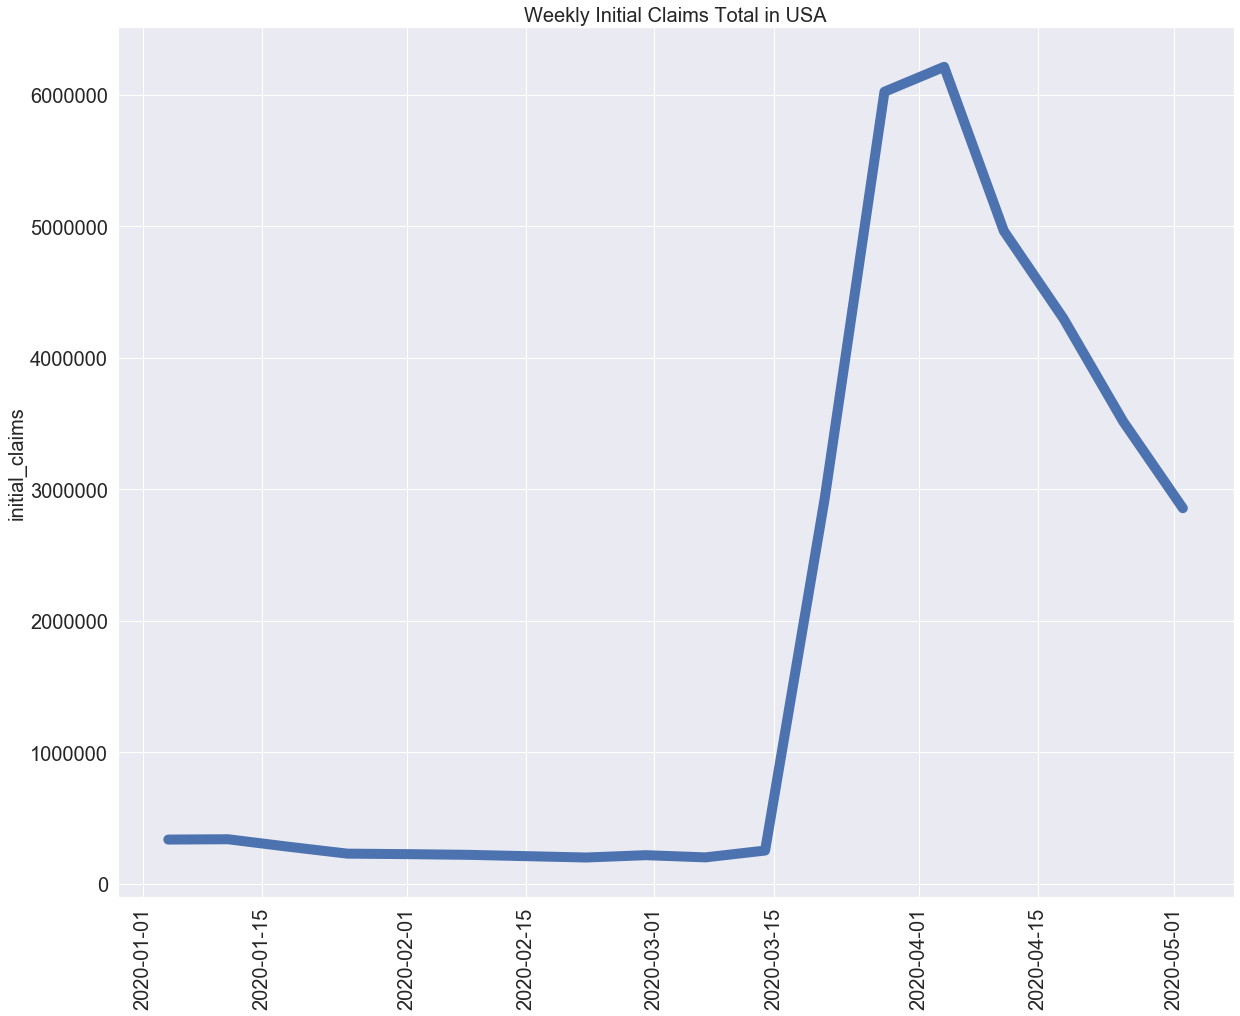

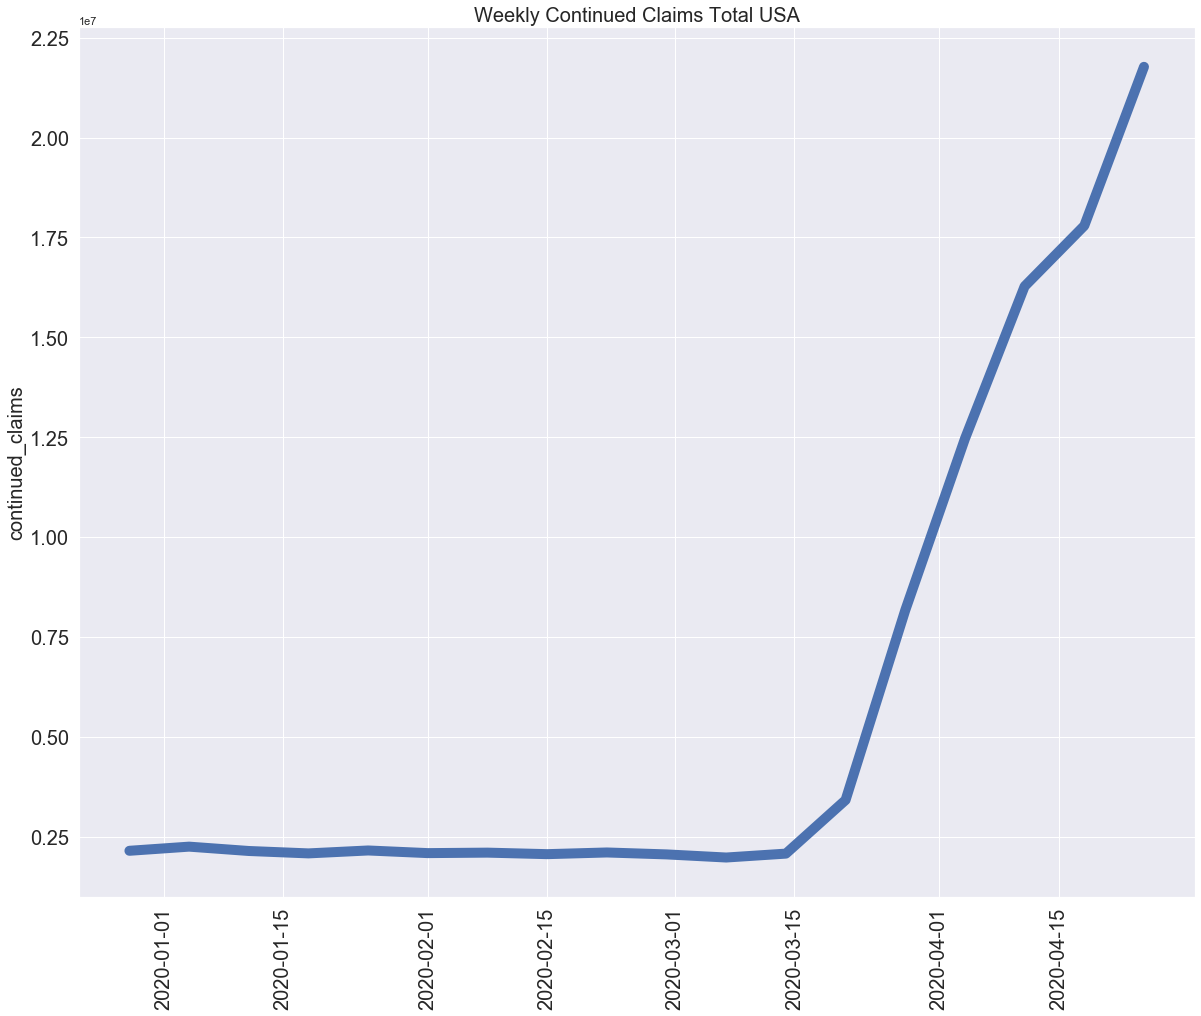

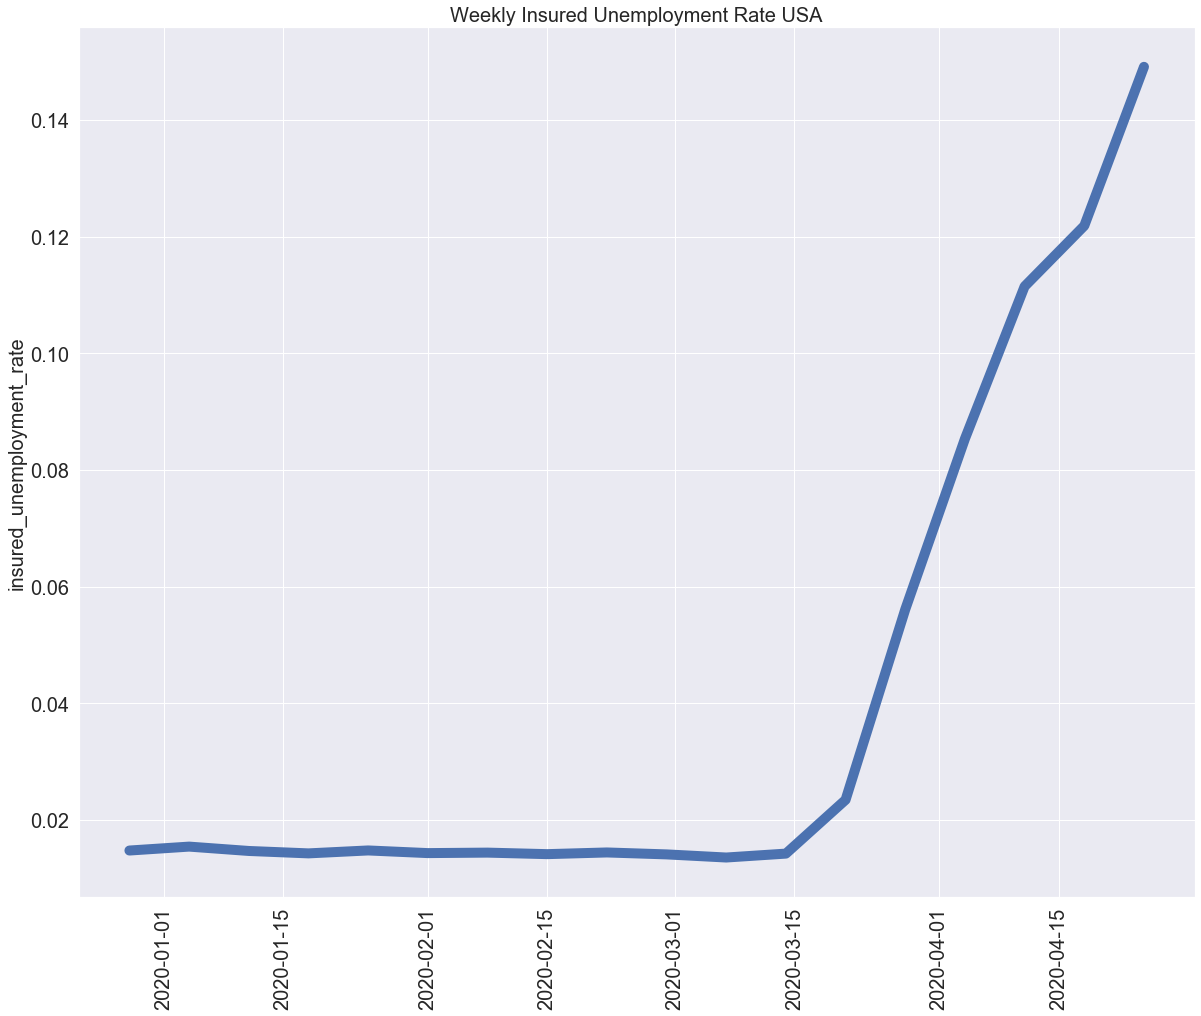

In [20]:
make_plot(initial_claims_grouped, 'filed_week_ended', 'initial_claims', 'Weekly Initial Claims Total in USA')
make_plot(continued_claims_grouped, 'reflecting_week_ended', 'continued_claims', 'Weekly Continued Claims Total USA')
make_plot(continued_claims_grouped, 'reflecting_week_ended', 'insured_unemployment_rate', 'Weekly Insured Unemployment Rate USA')

In [22]:
def make_plot(df, column1, column2, title):
    plt.figure(figsize=(20,16))
    plt.plot(df[column1], df[column2], linewidth=10.0)
    plt.title(title, fontsize=20)
    plt.ylabel(column2, fontsize=20)
    plt.ylim(0, 30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

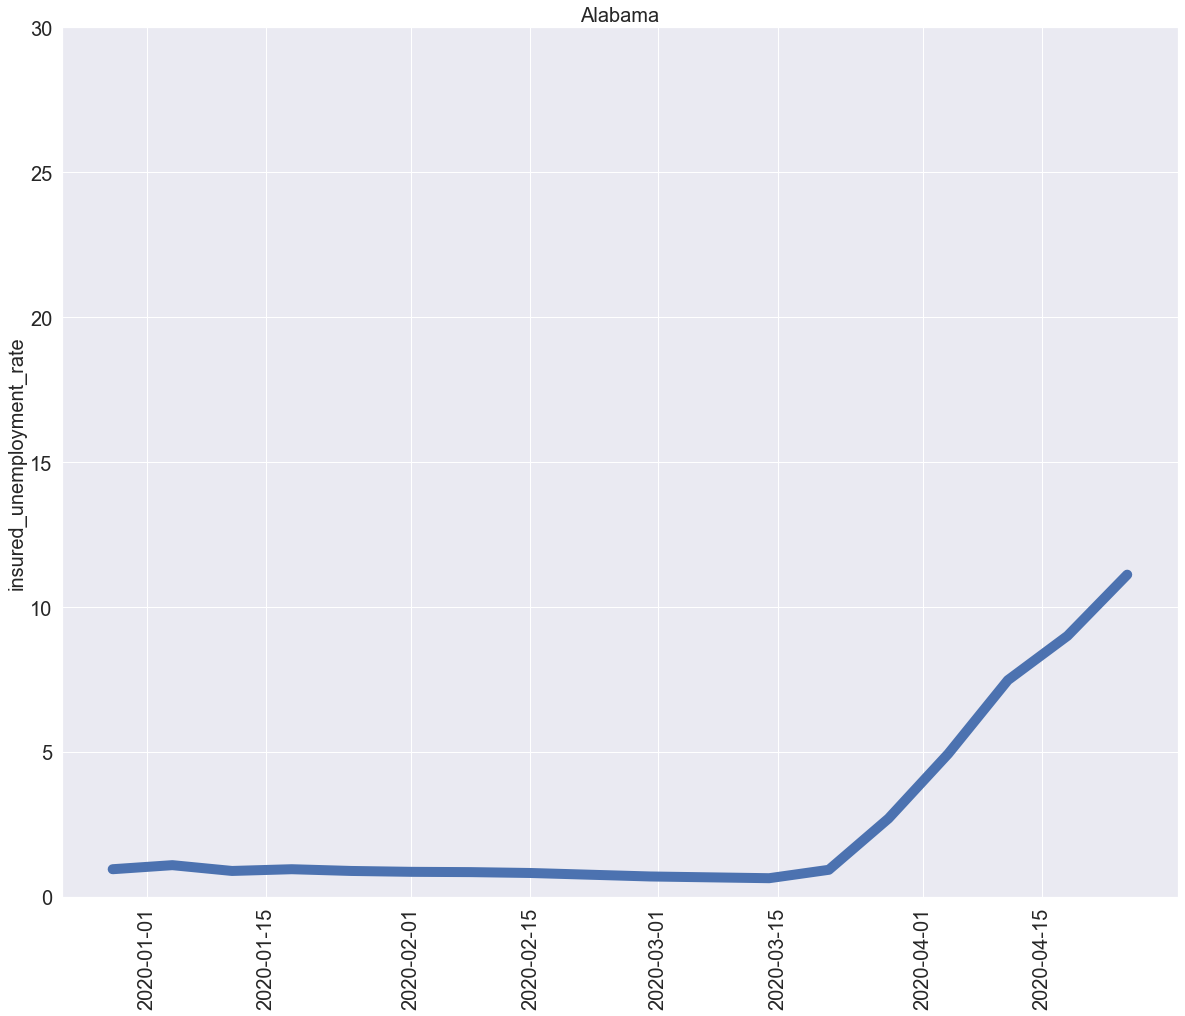

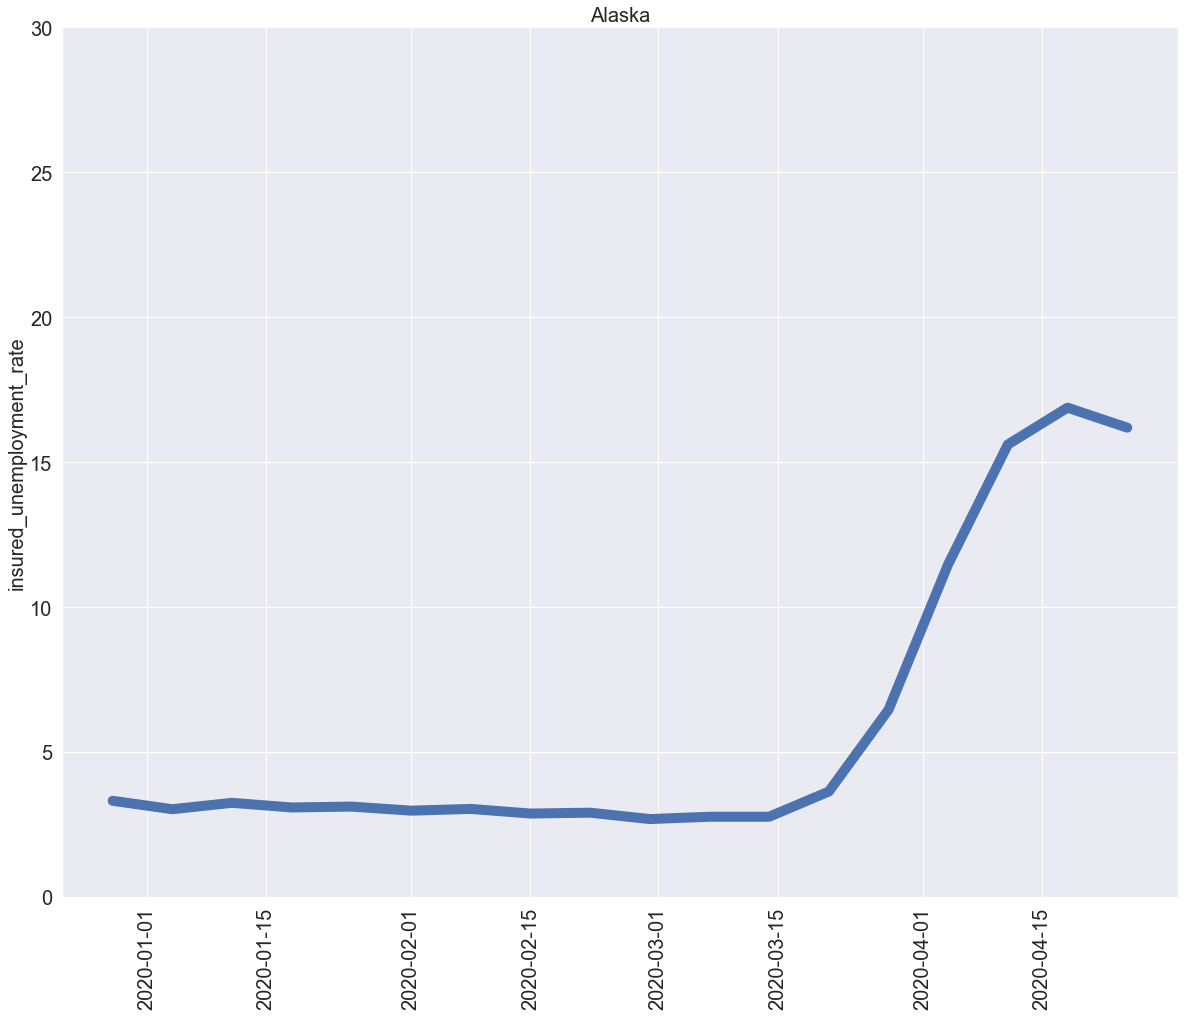

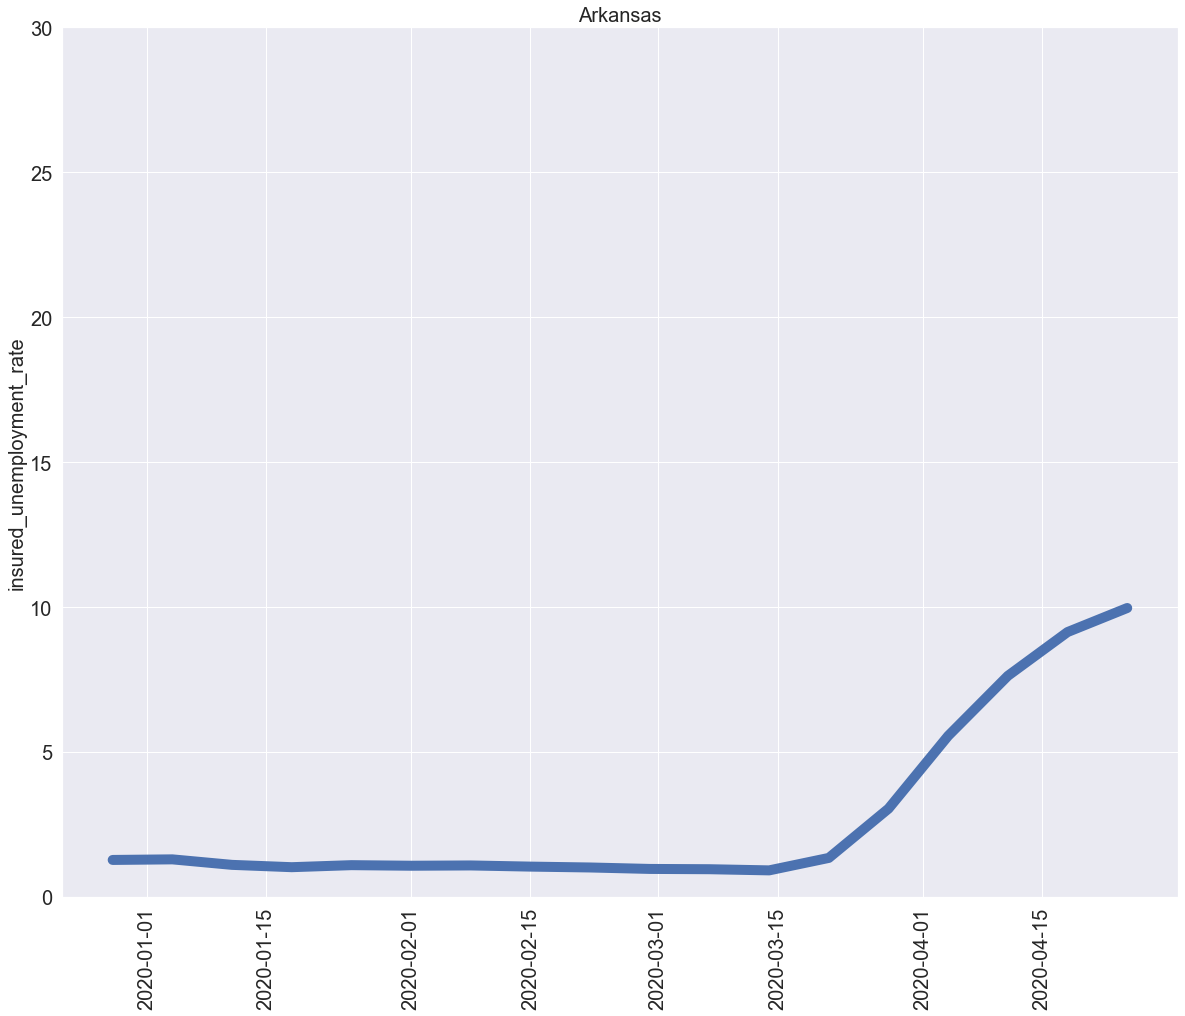

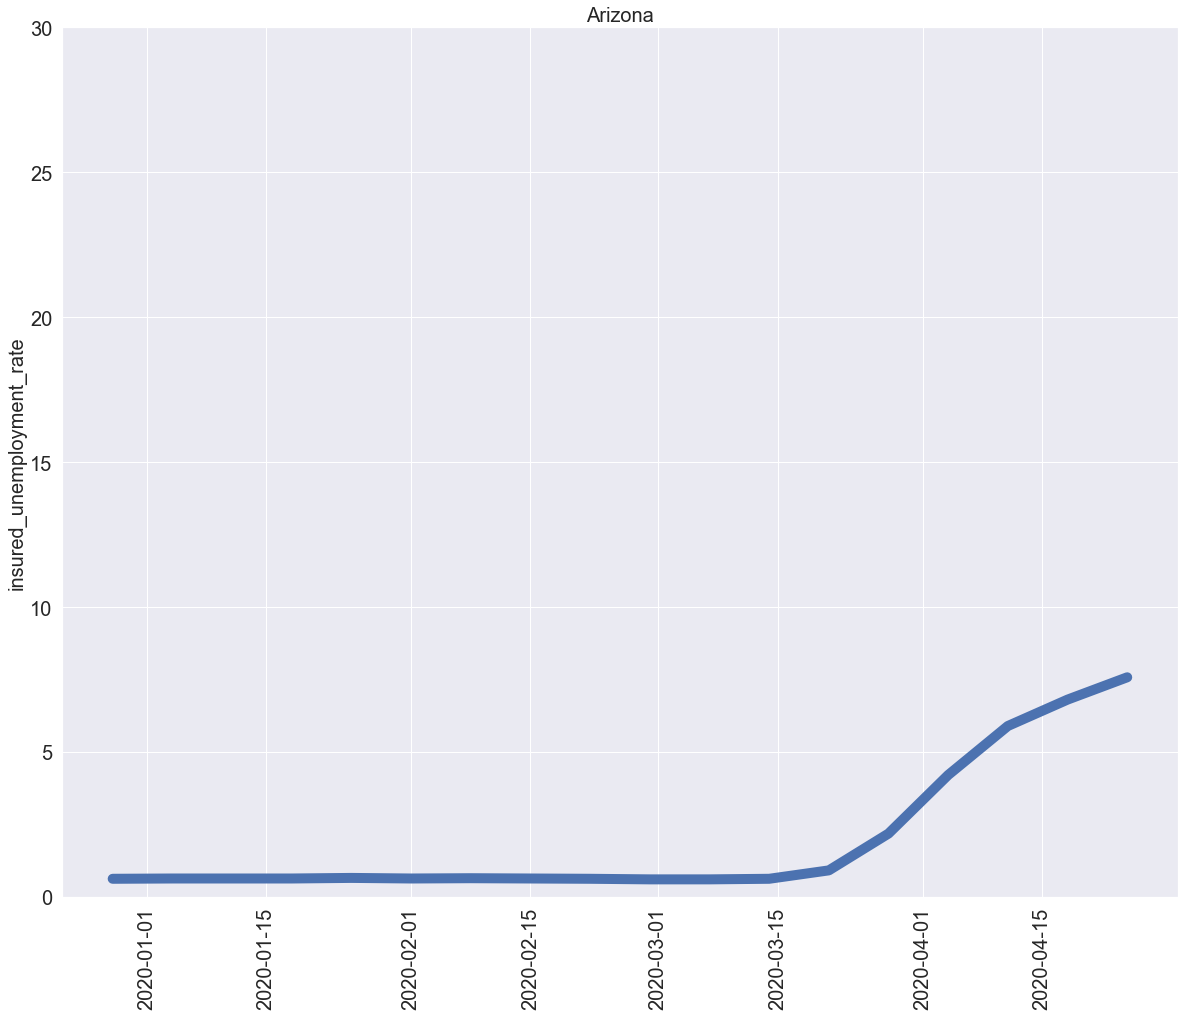

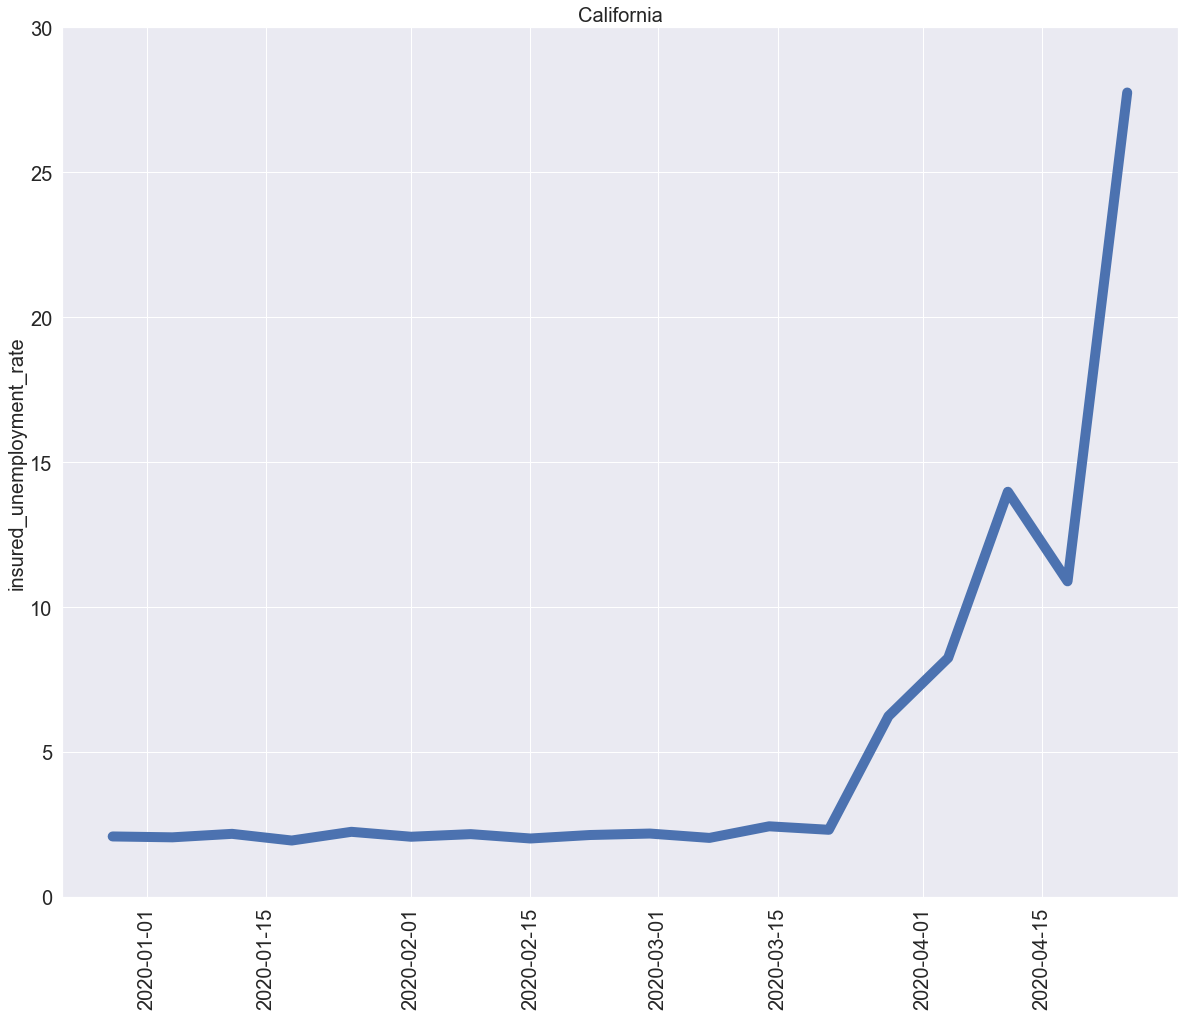

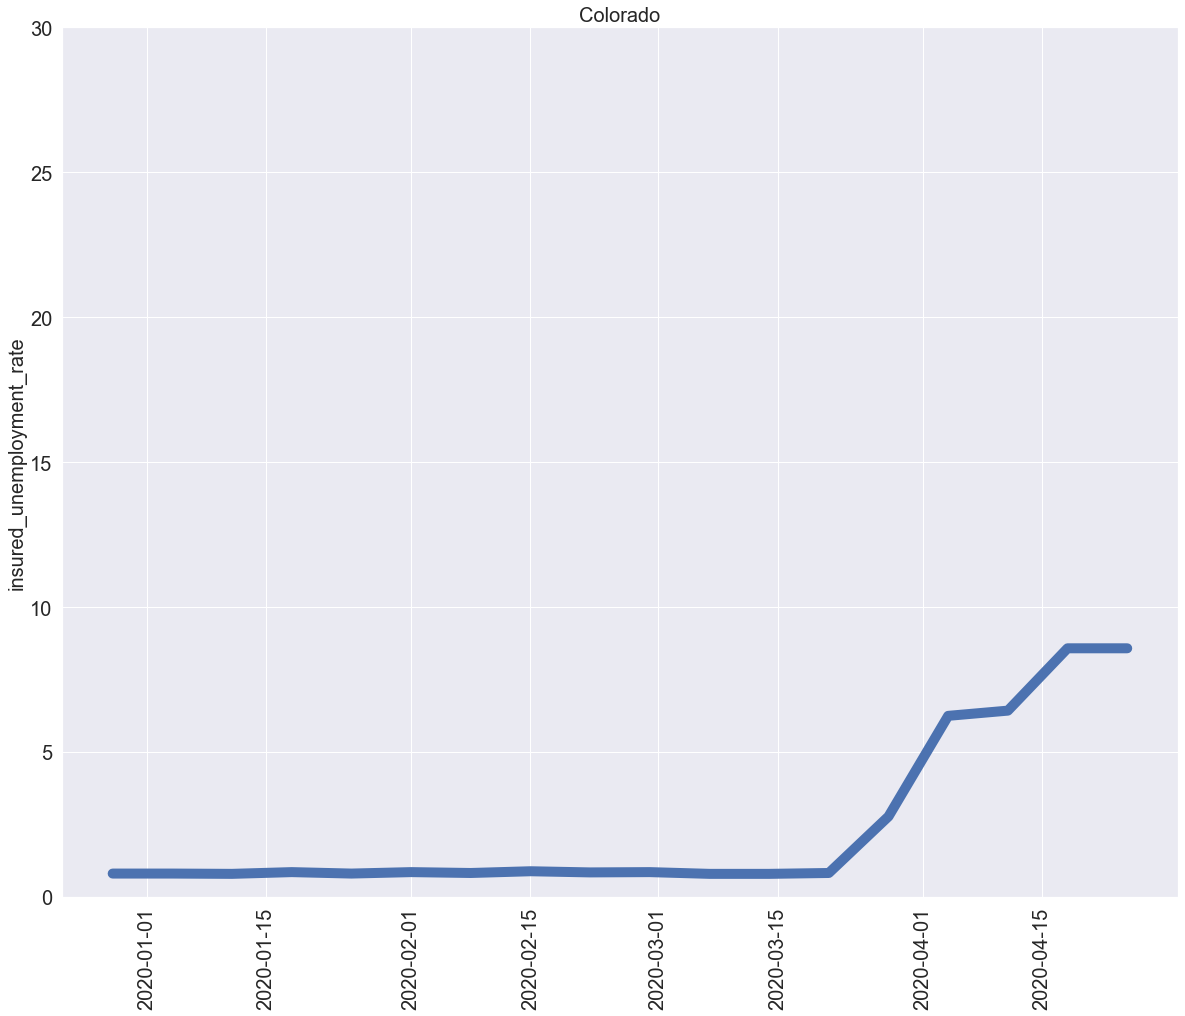

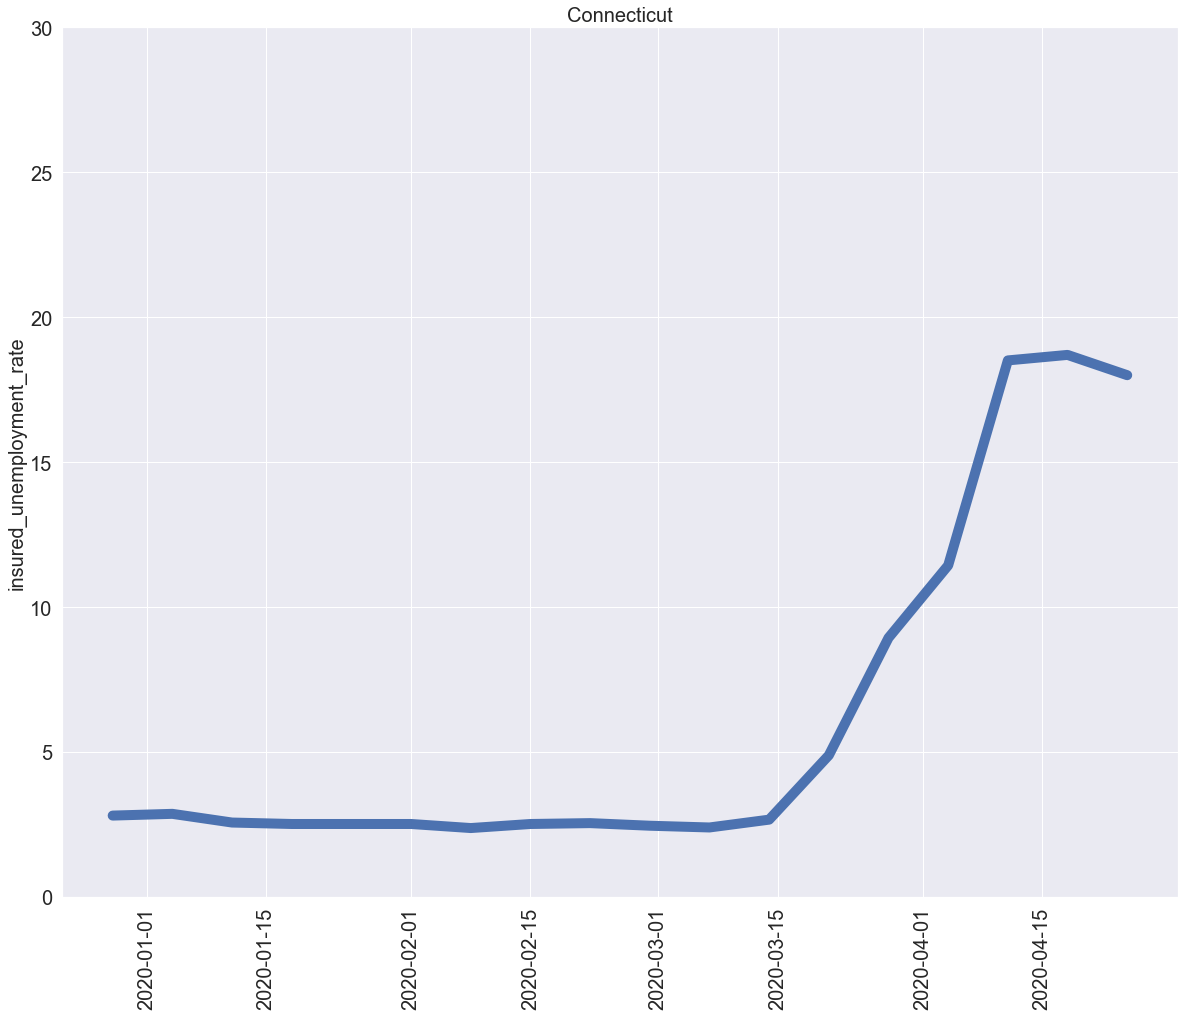

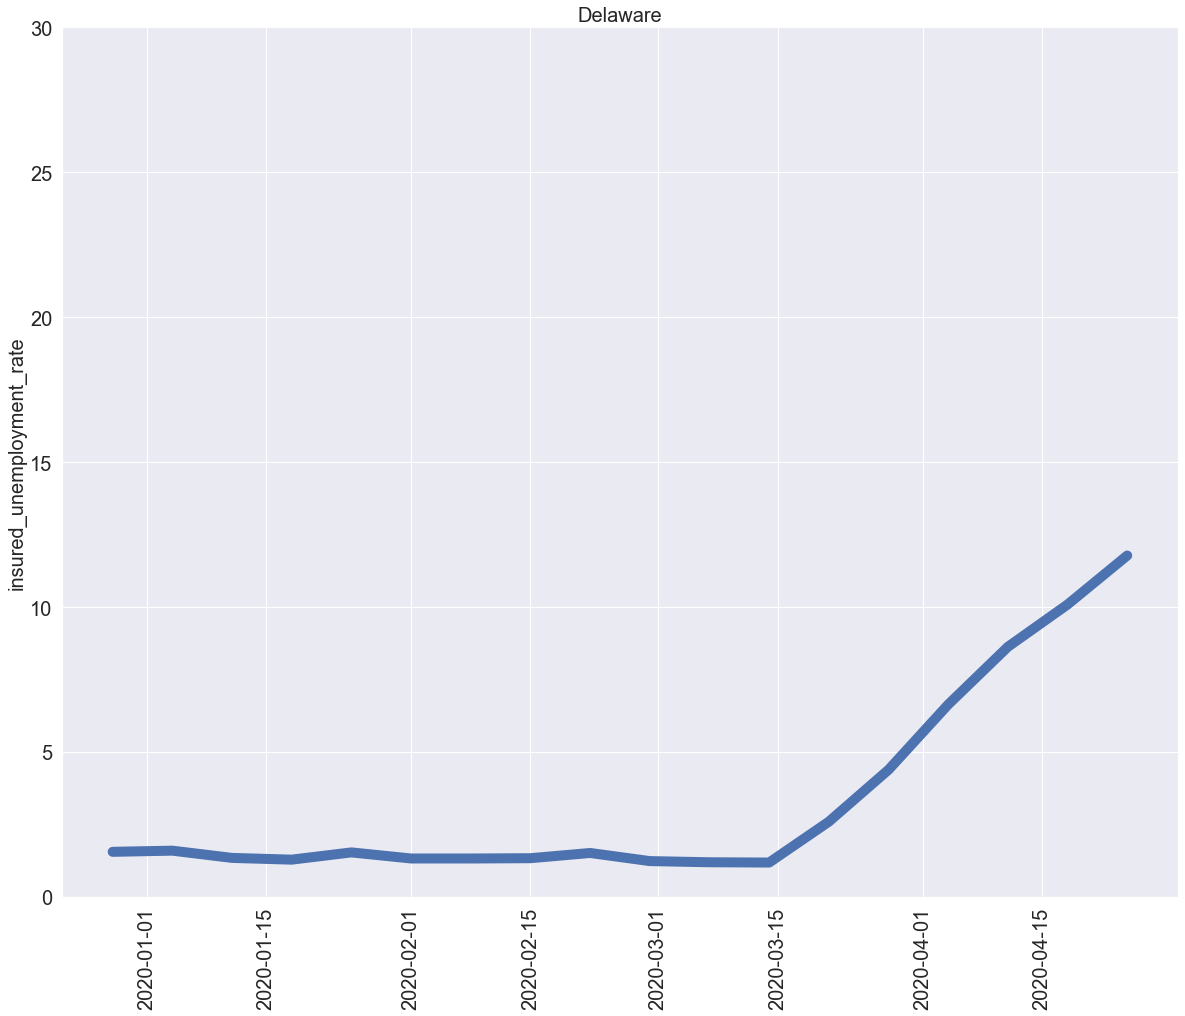

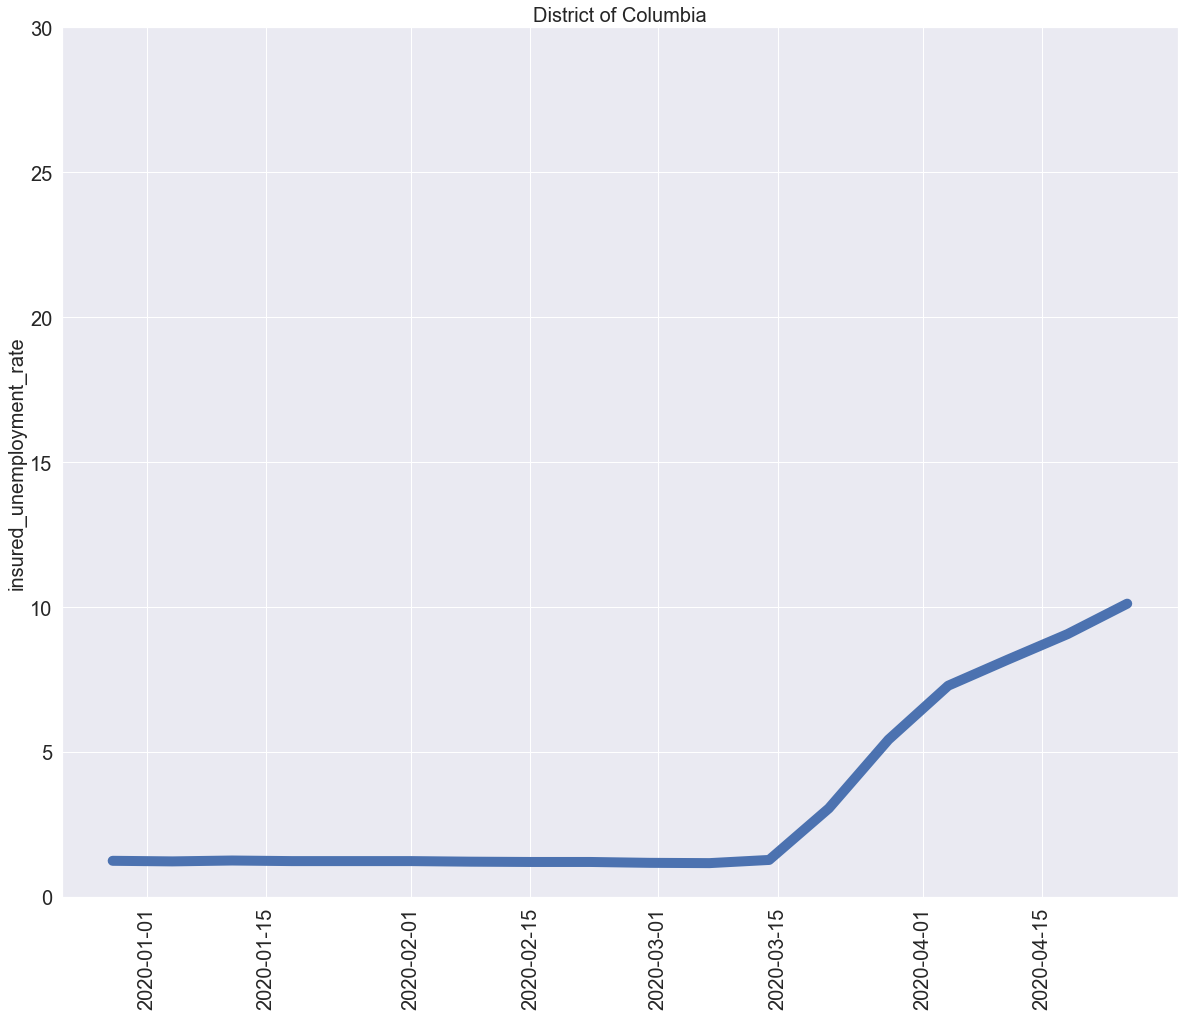

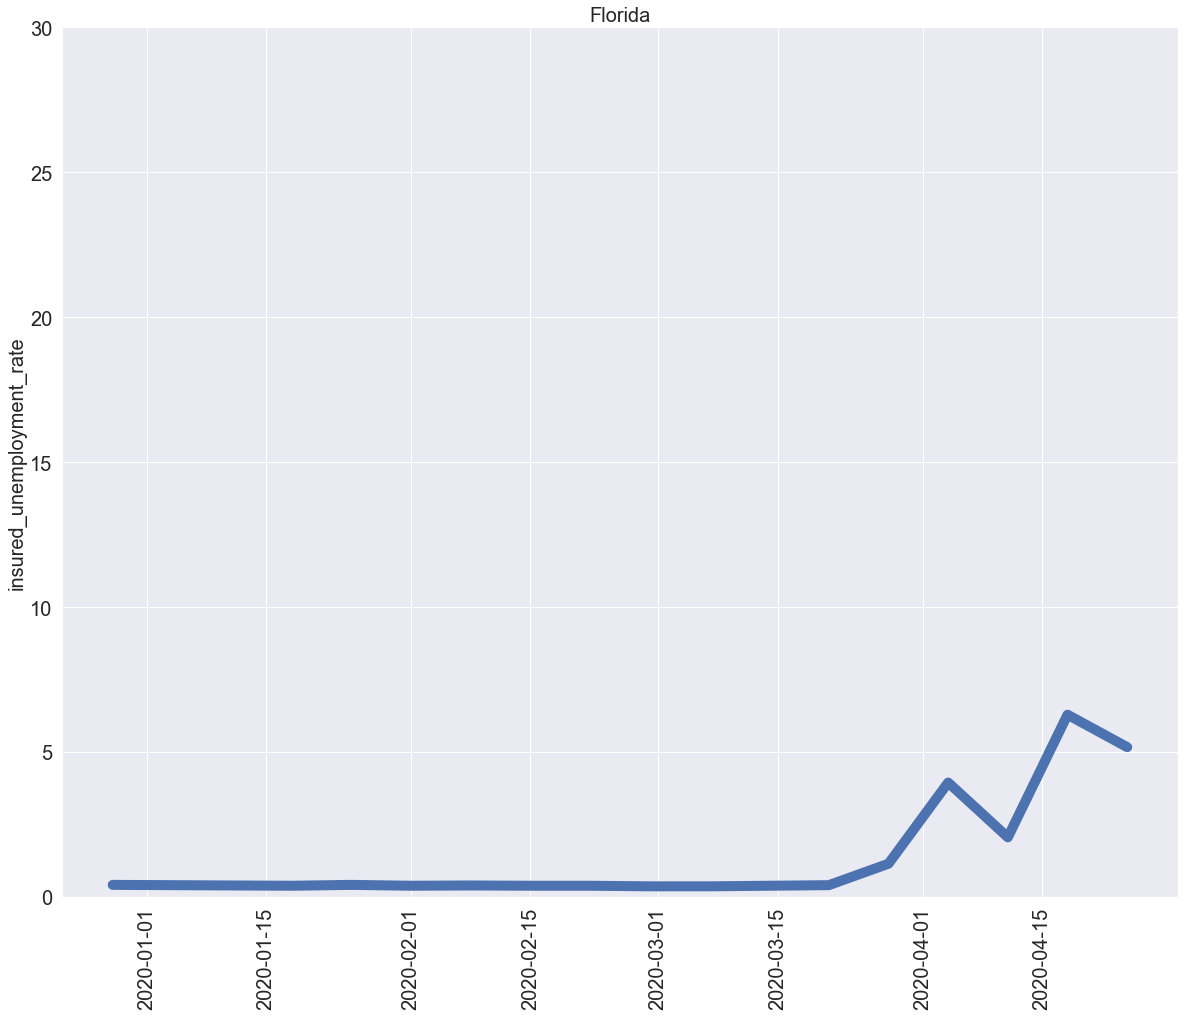

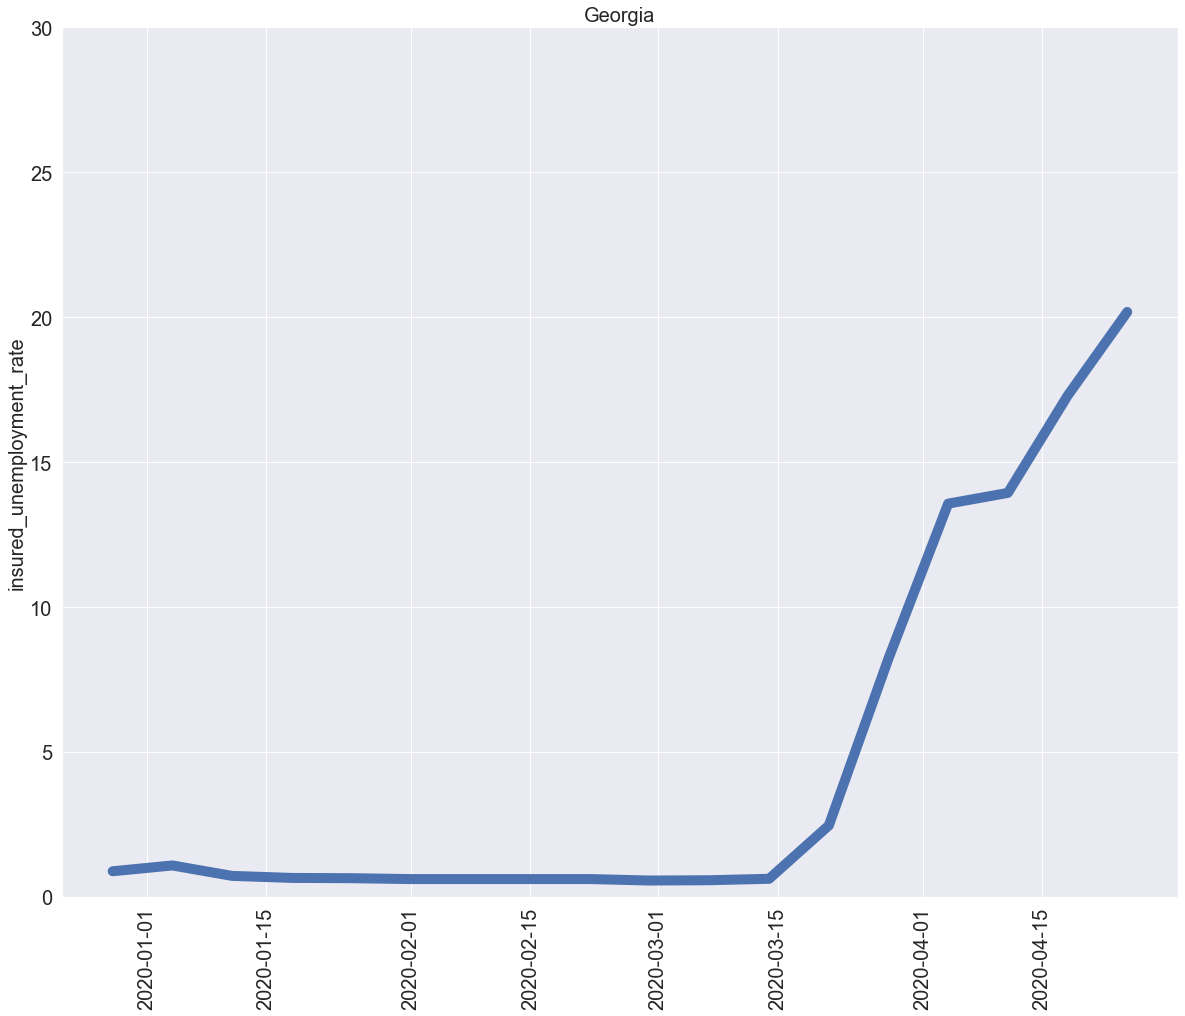

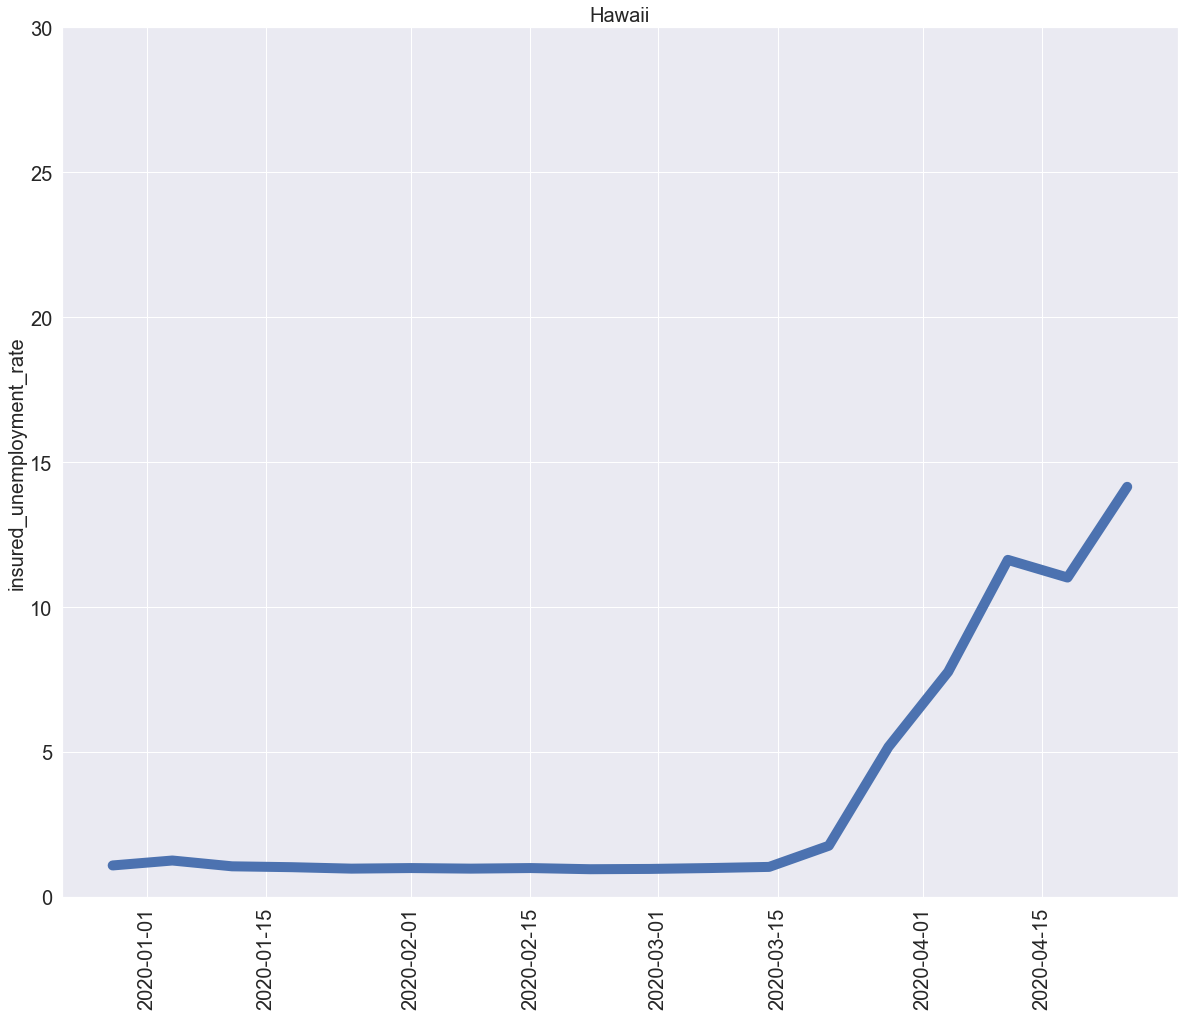

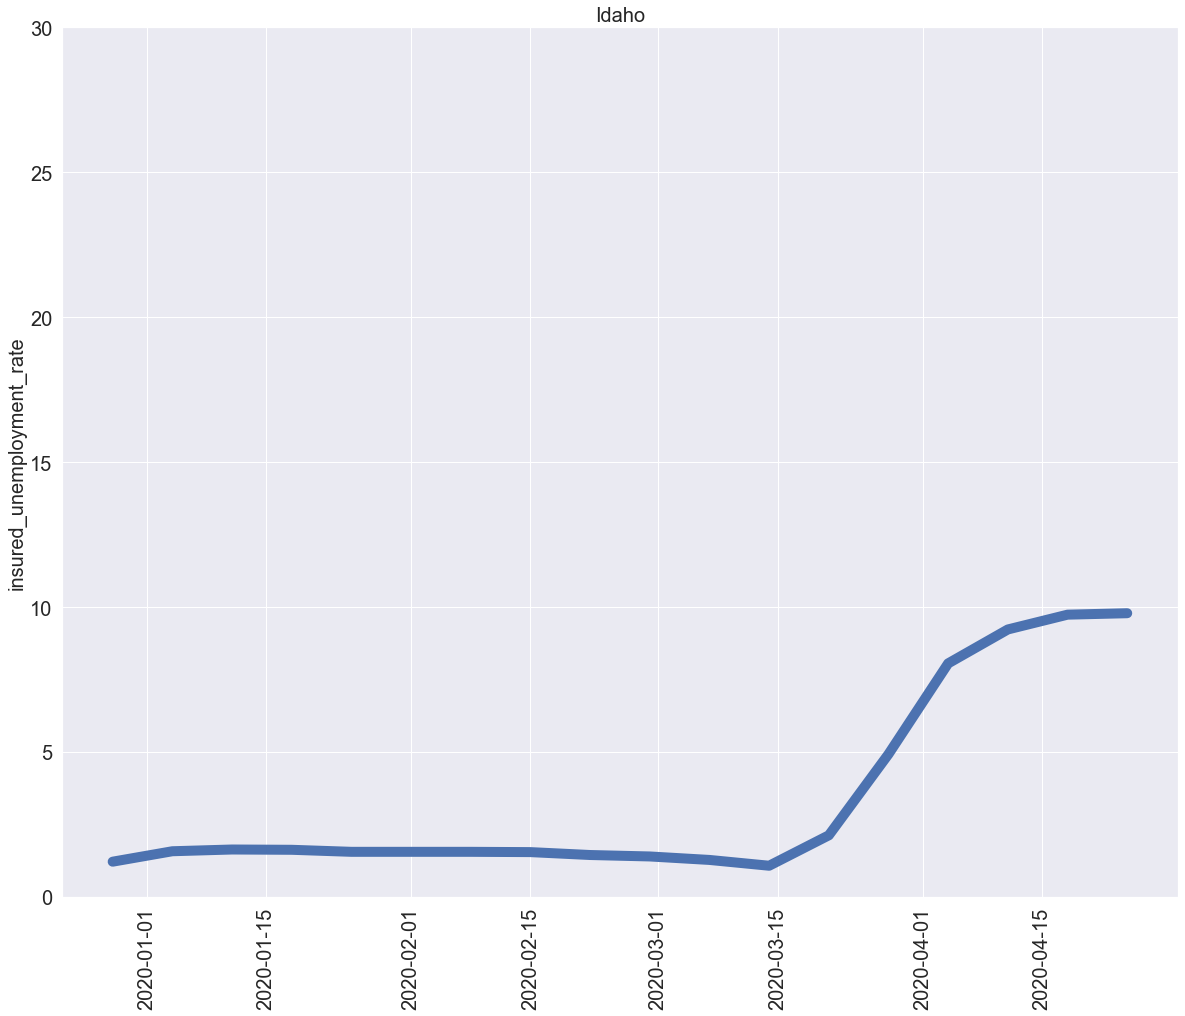

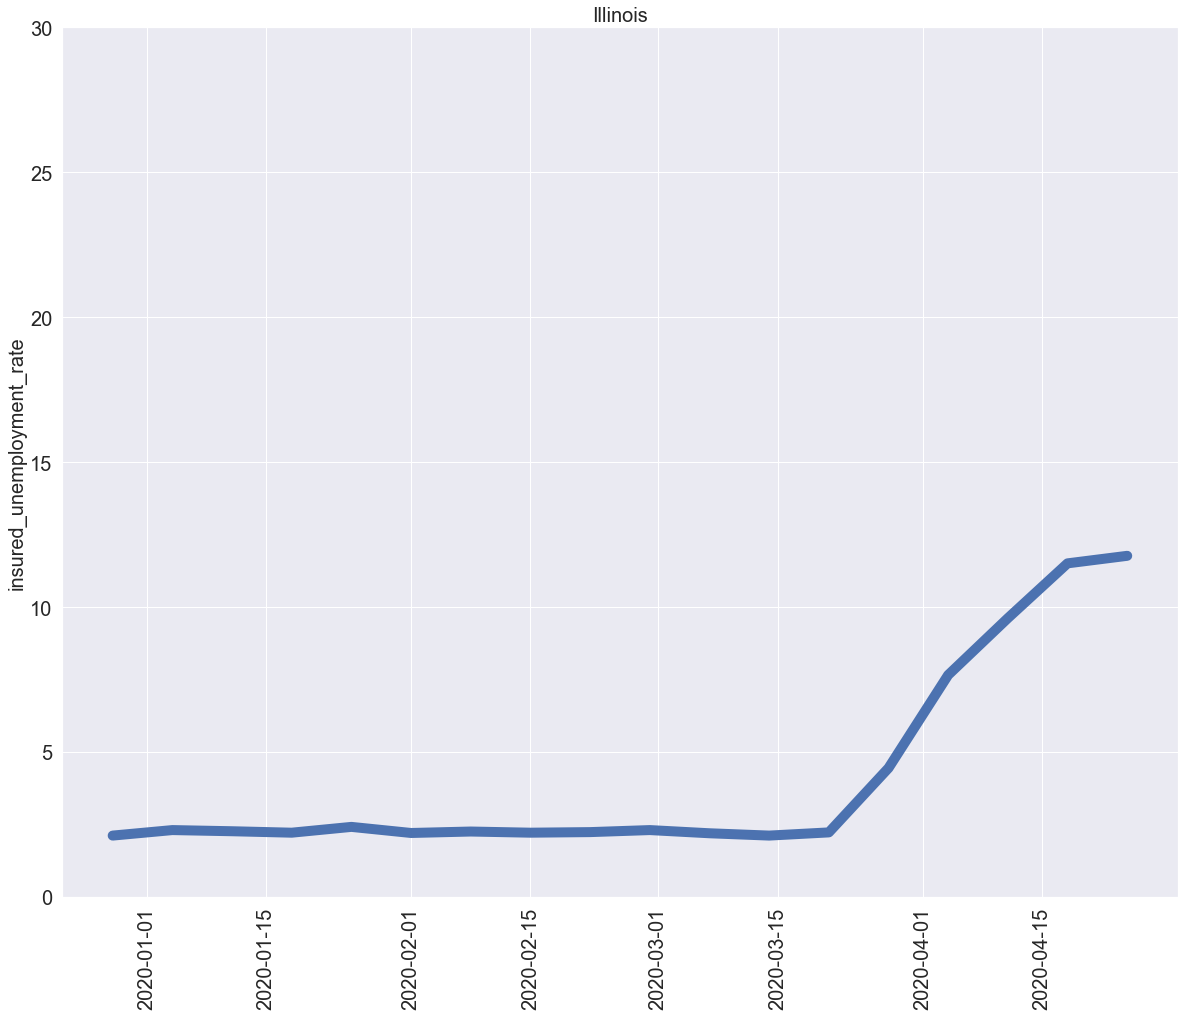

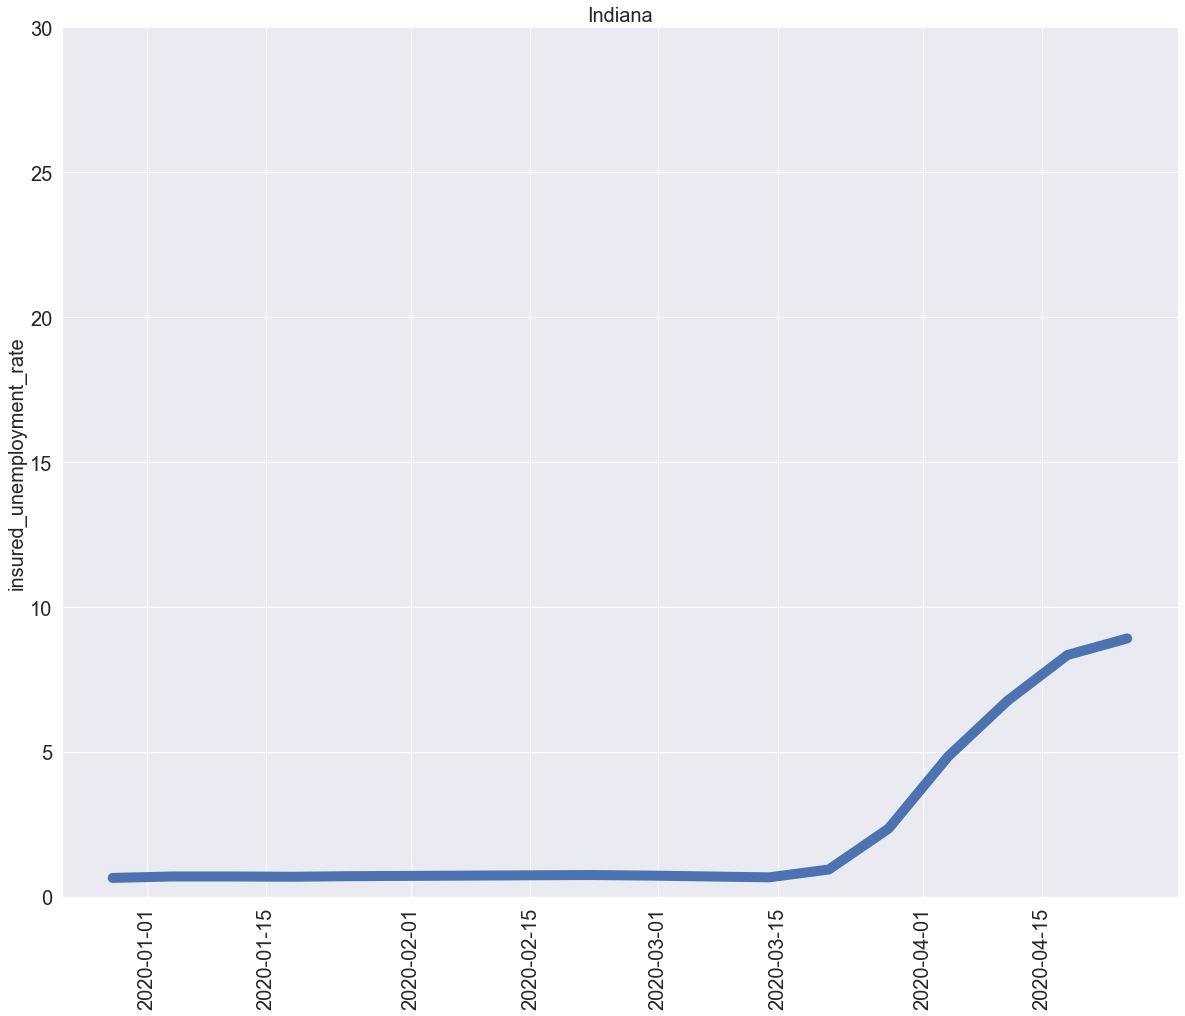

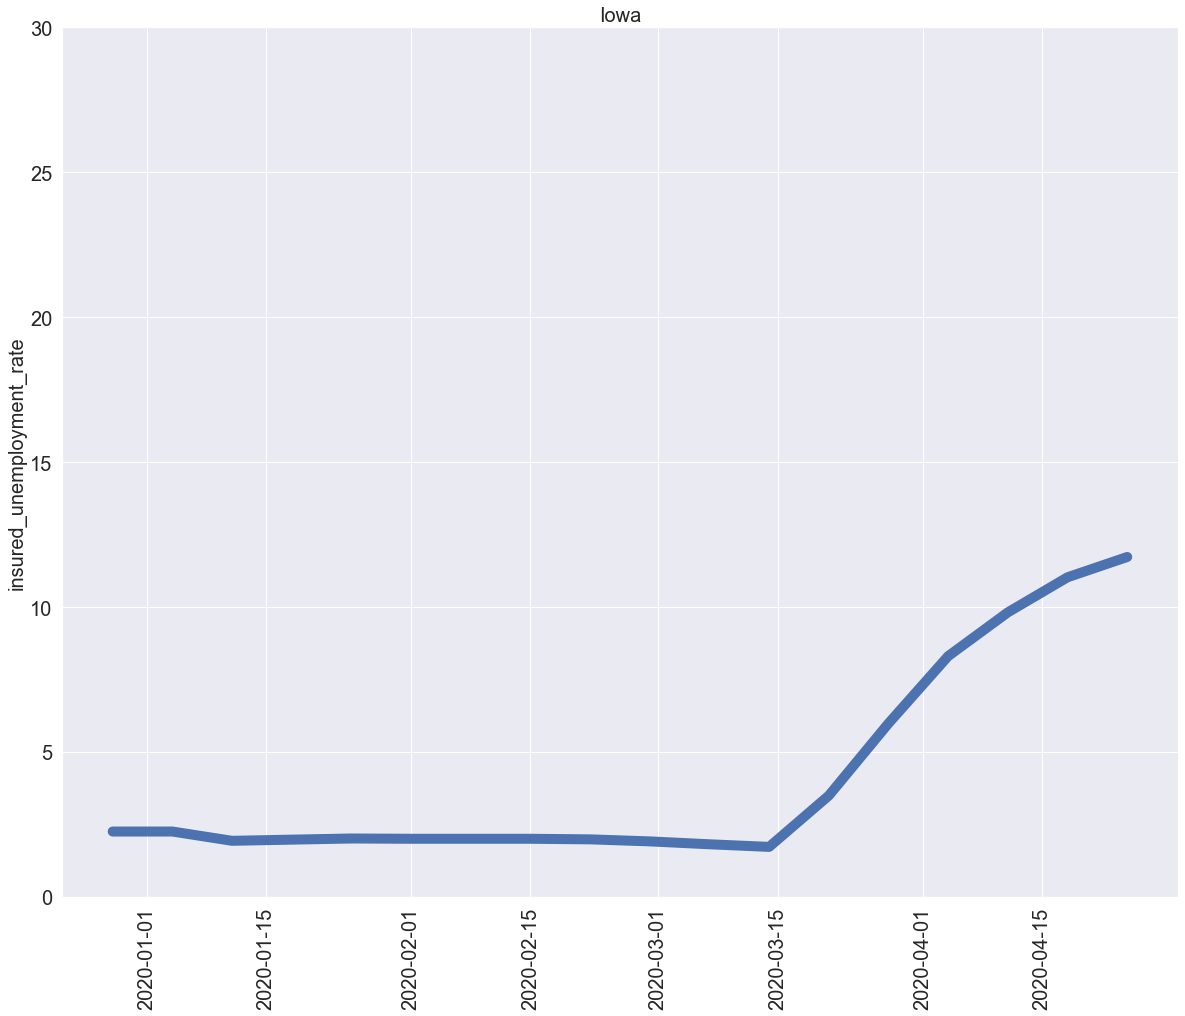

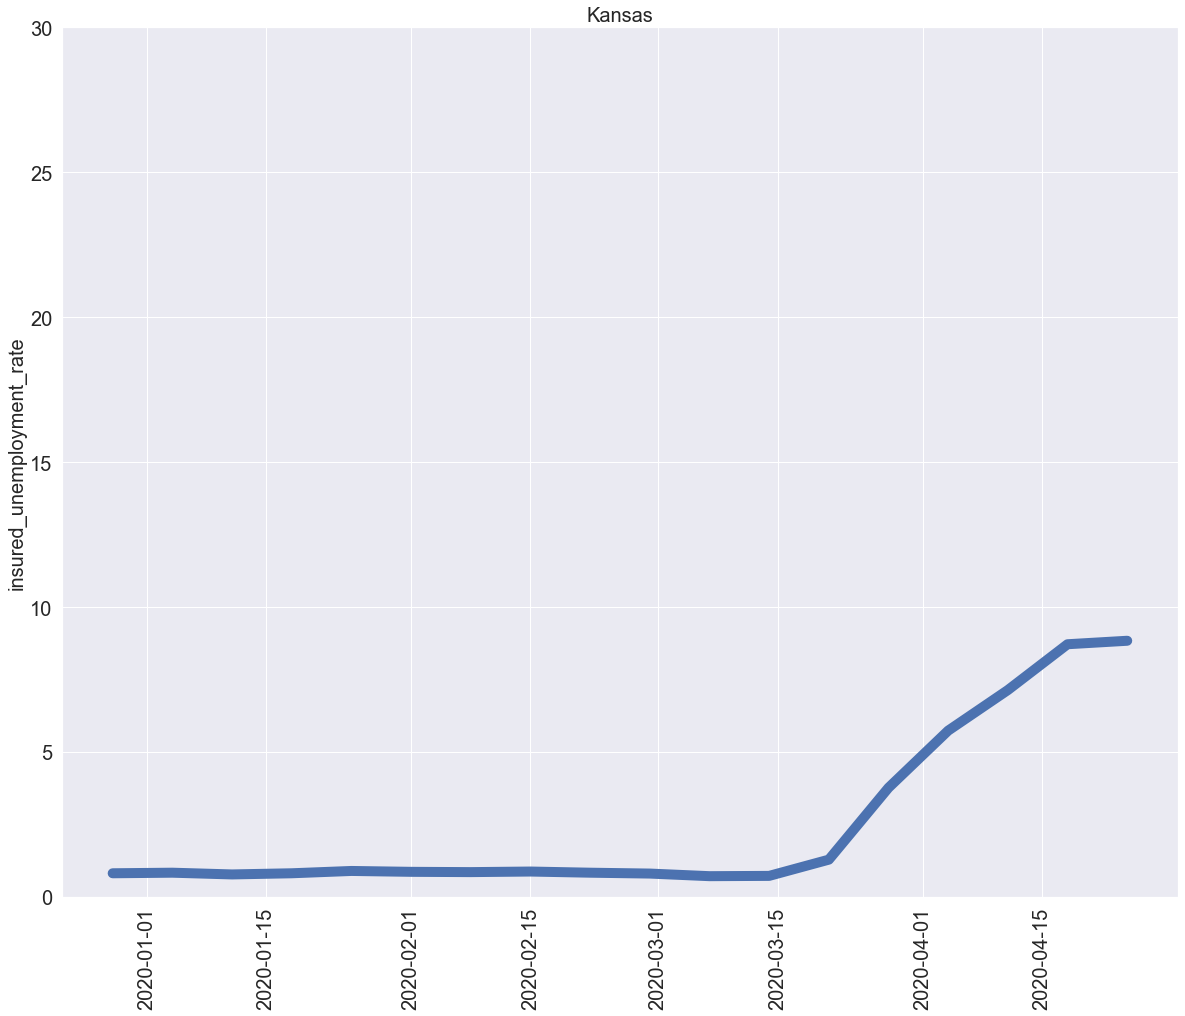

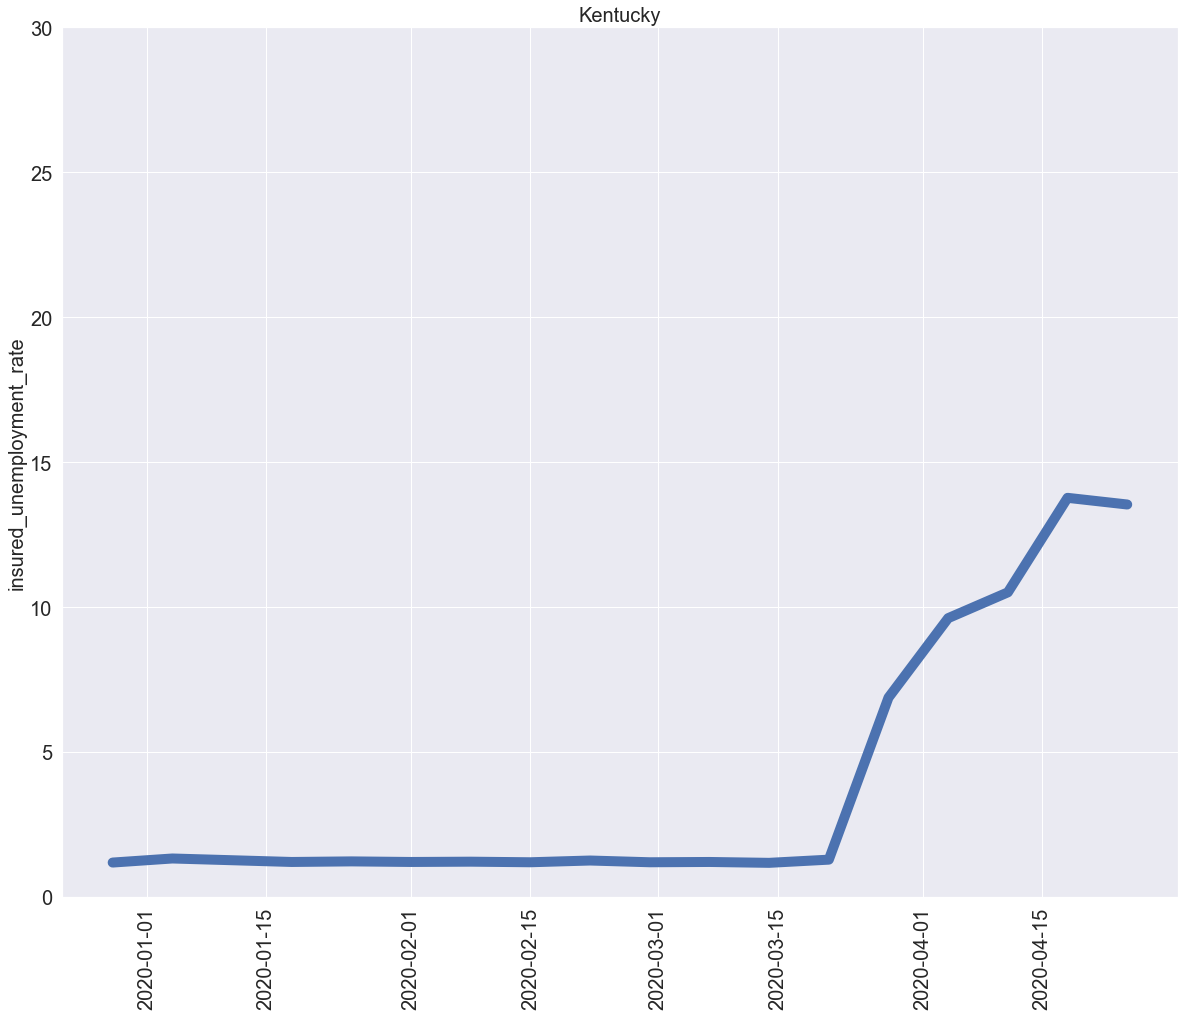

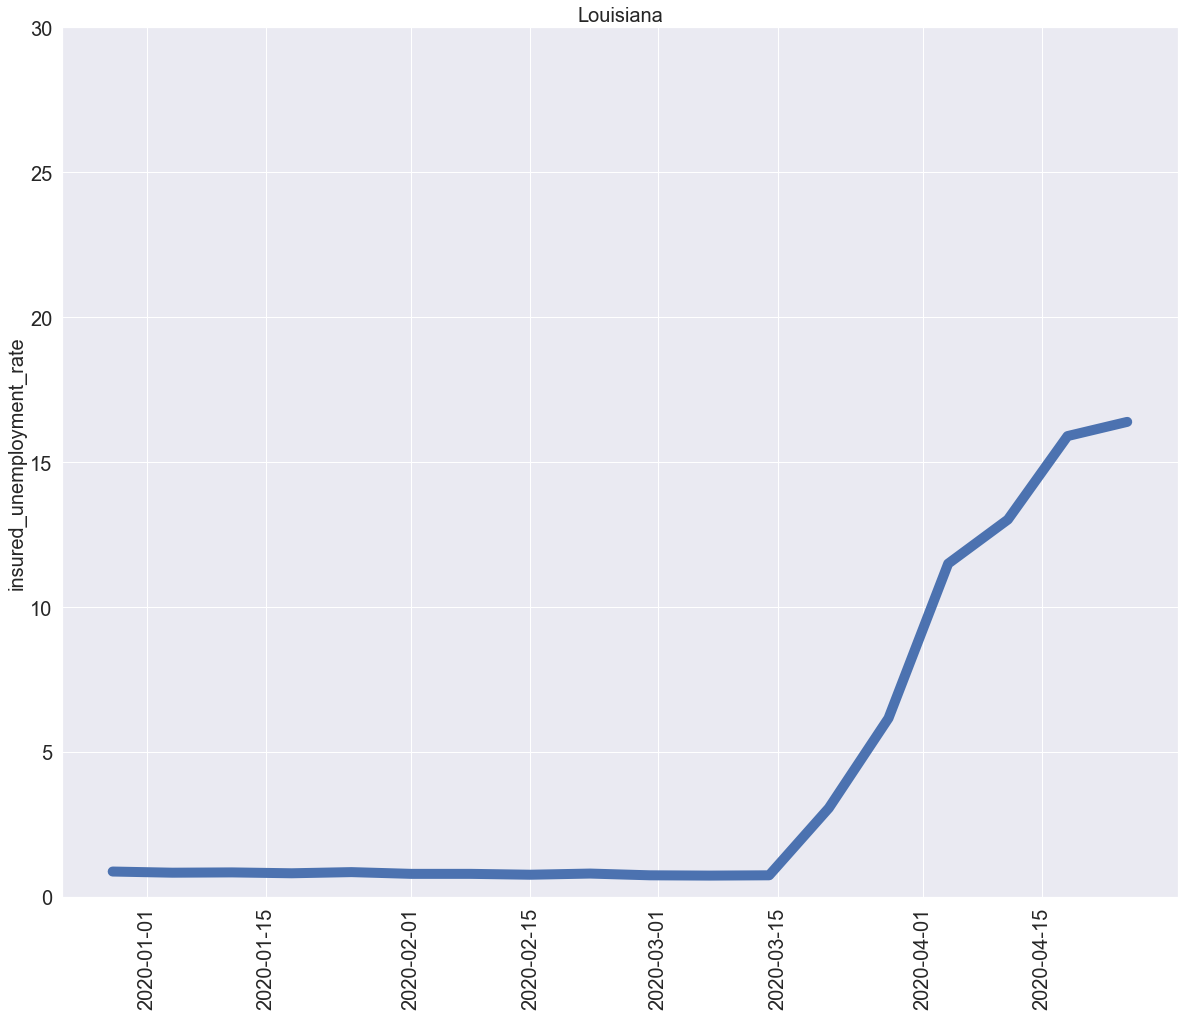

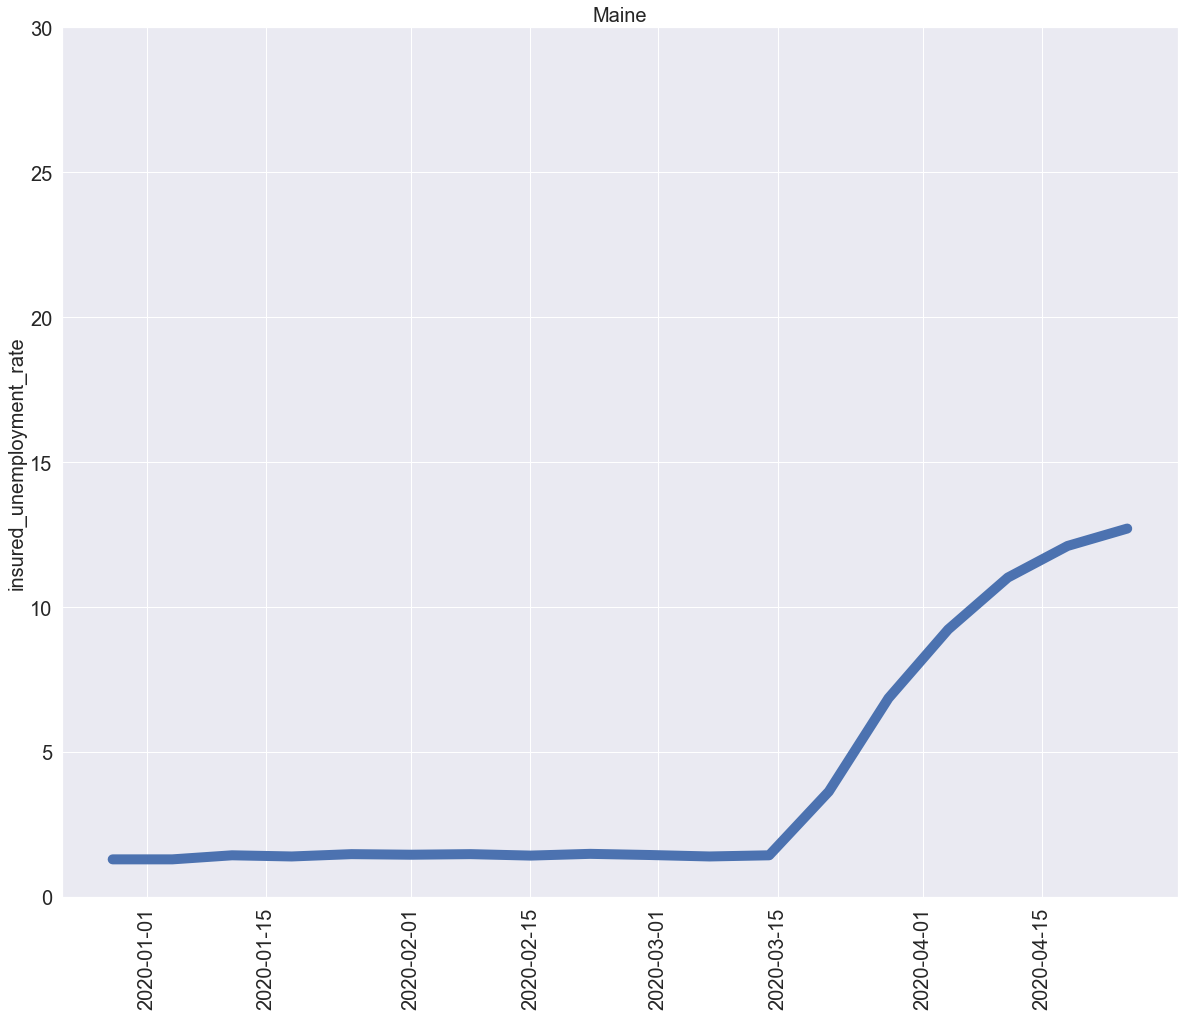

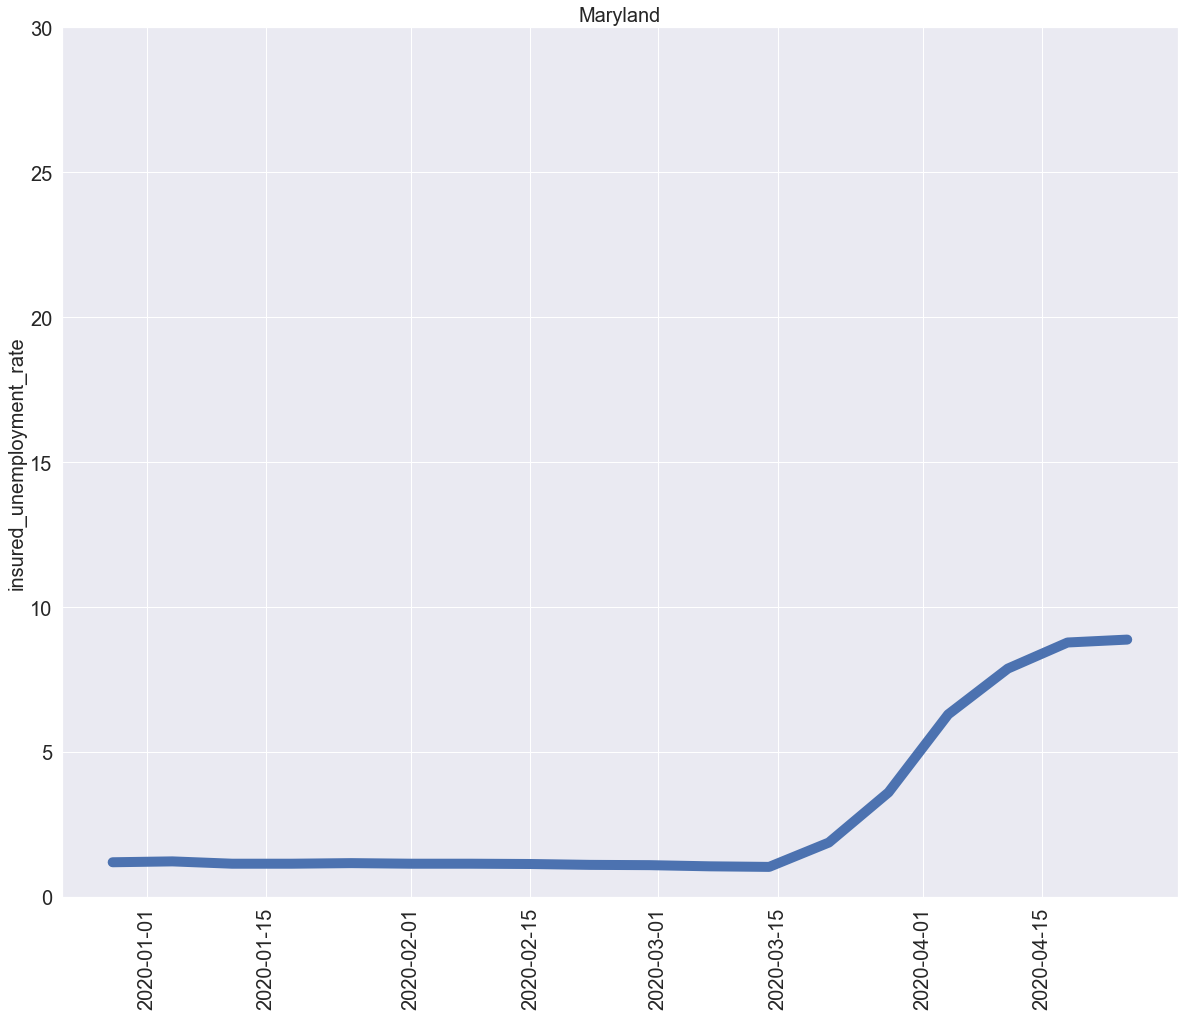

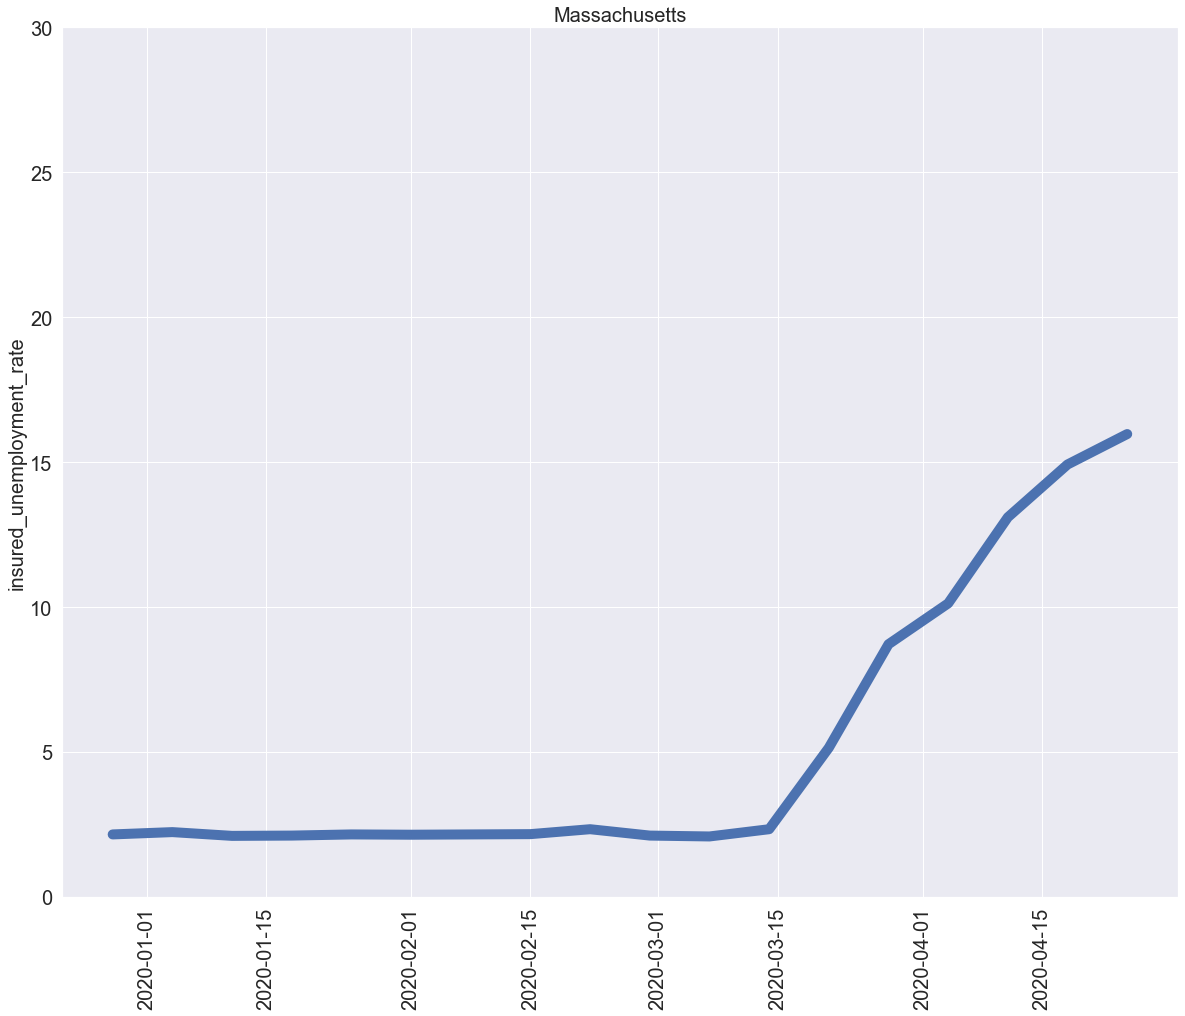

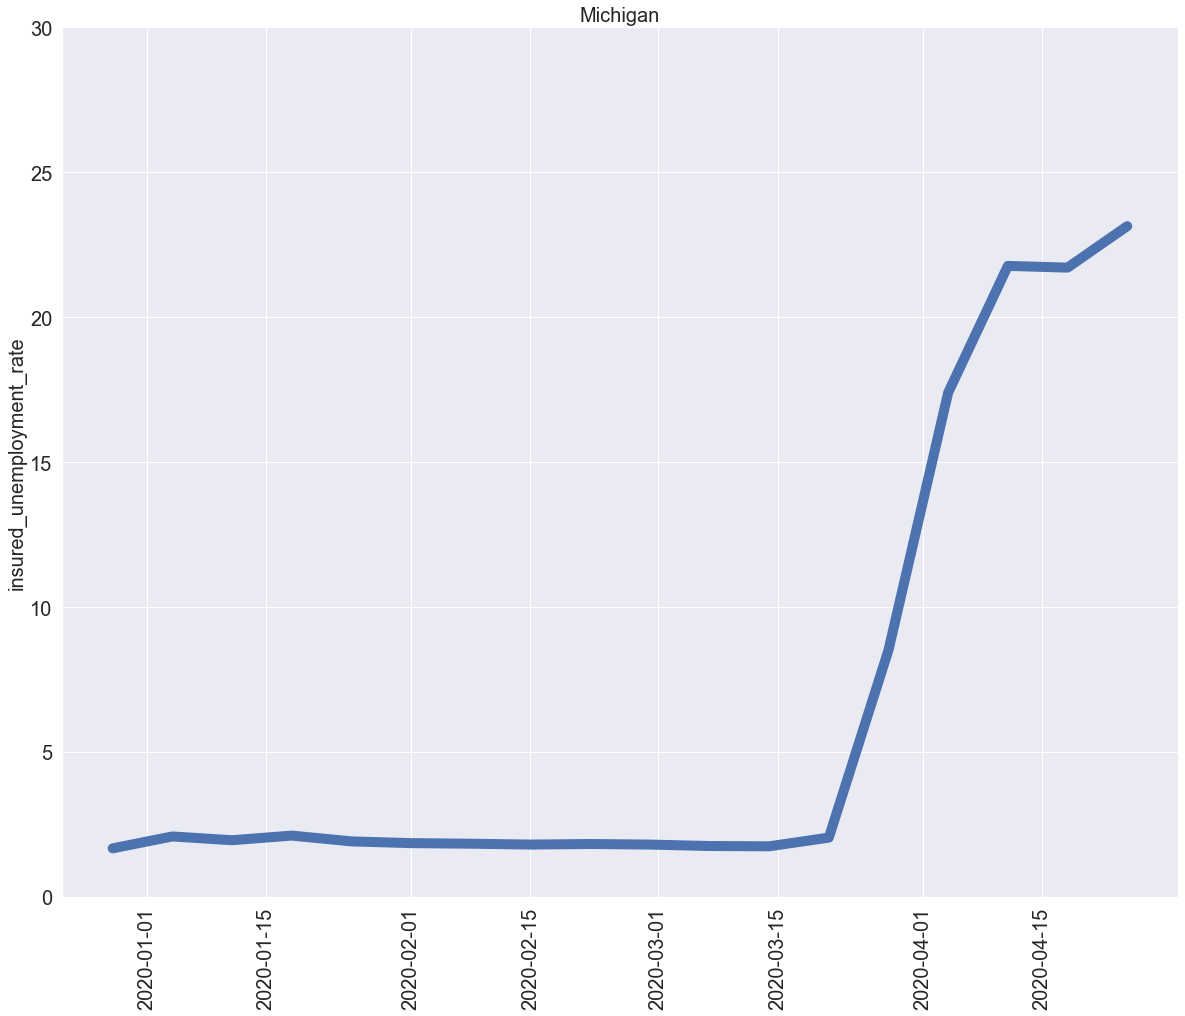

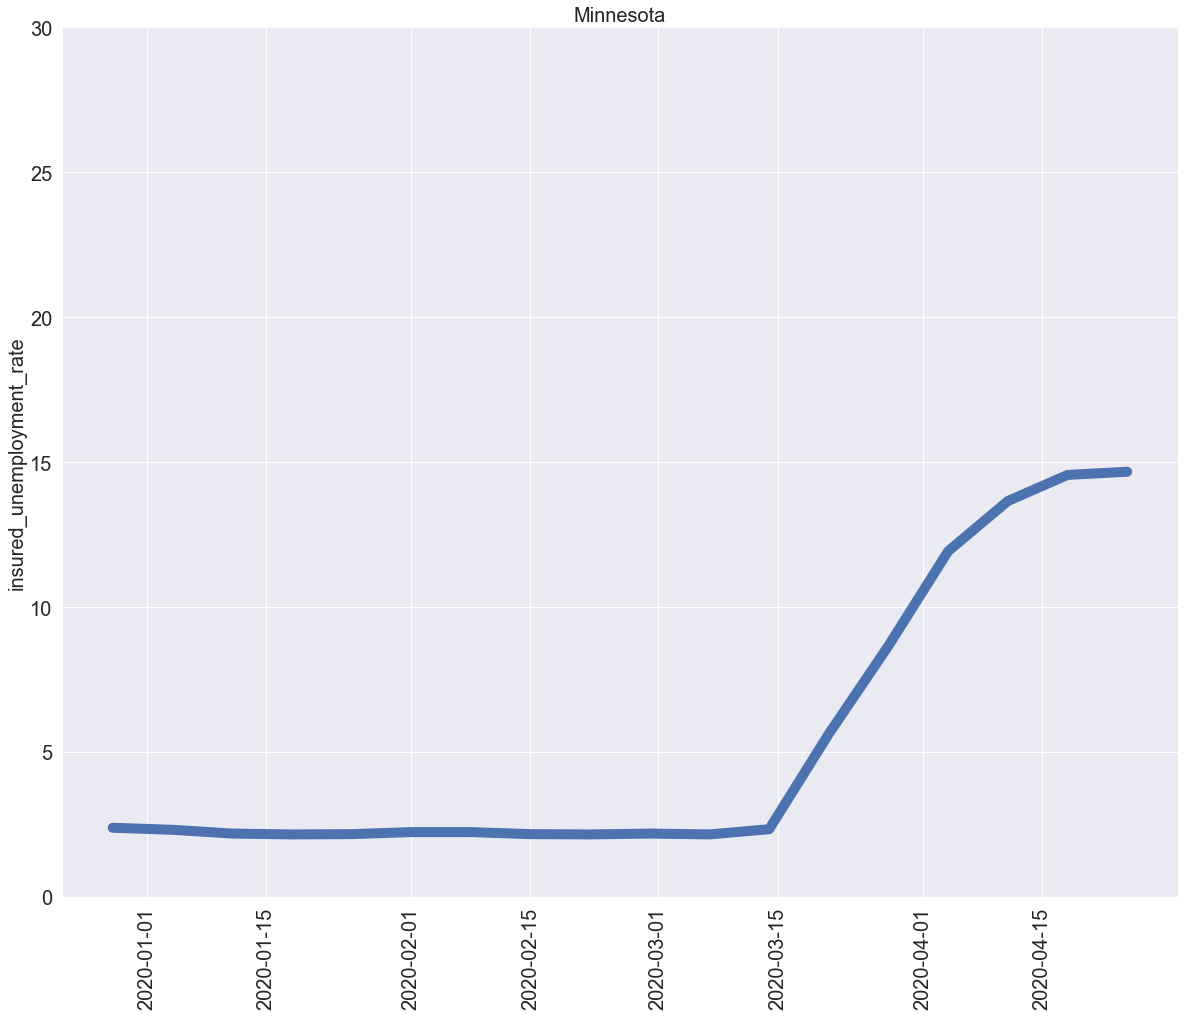

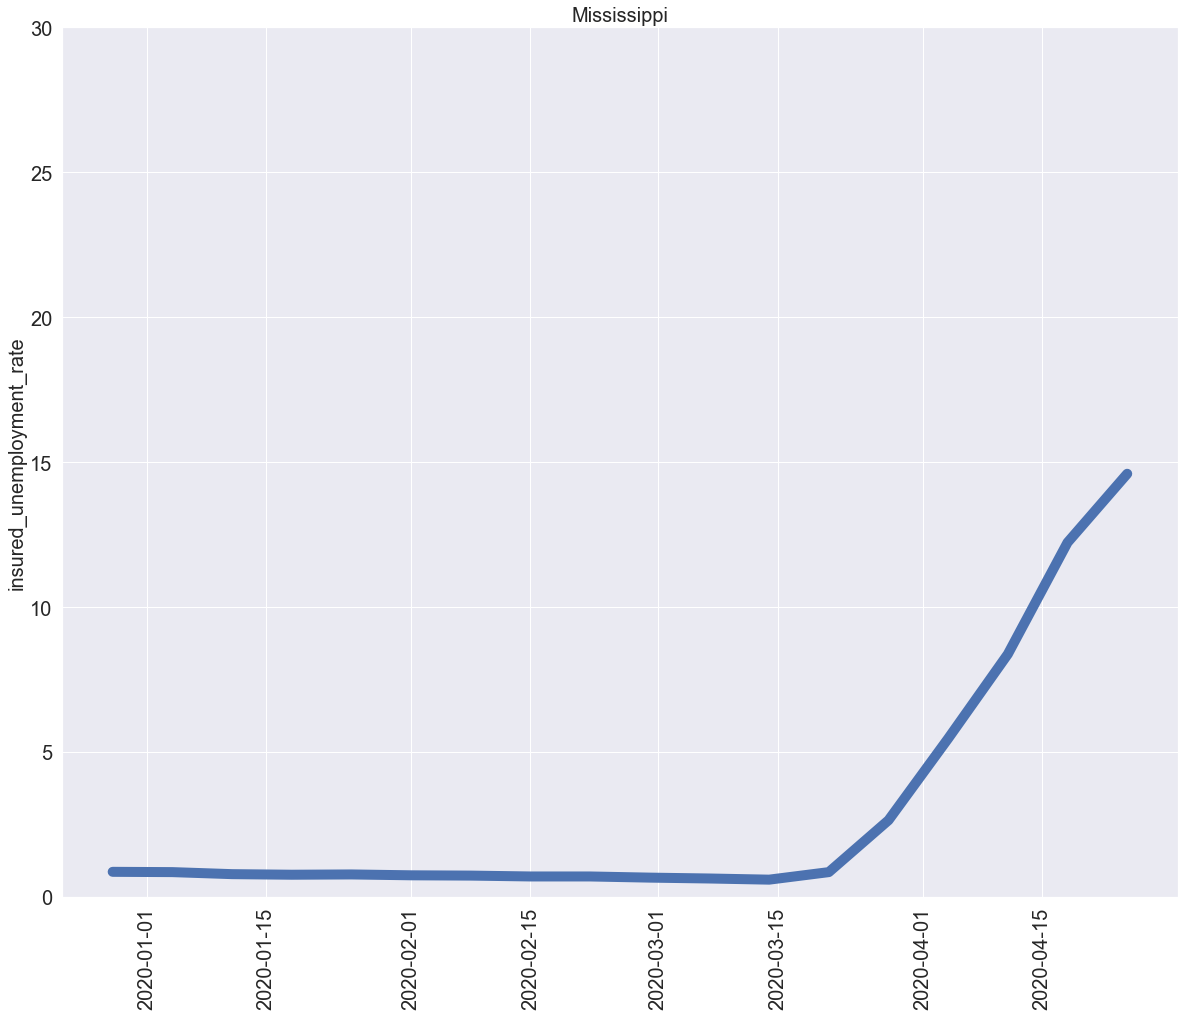

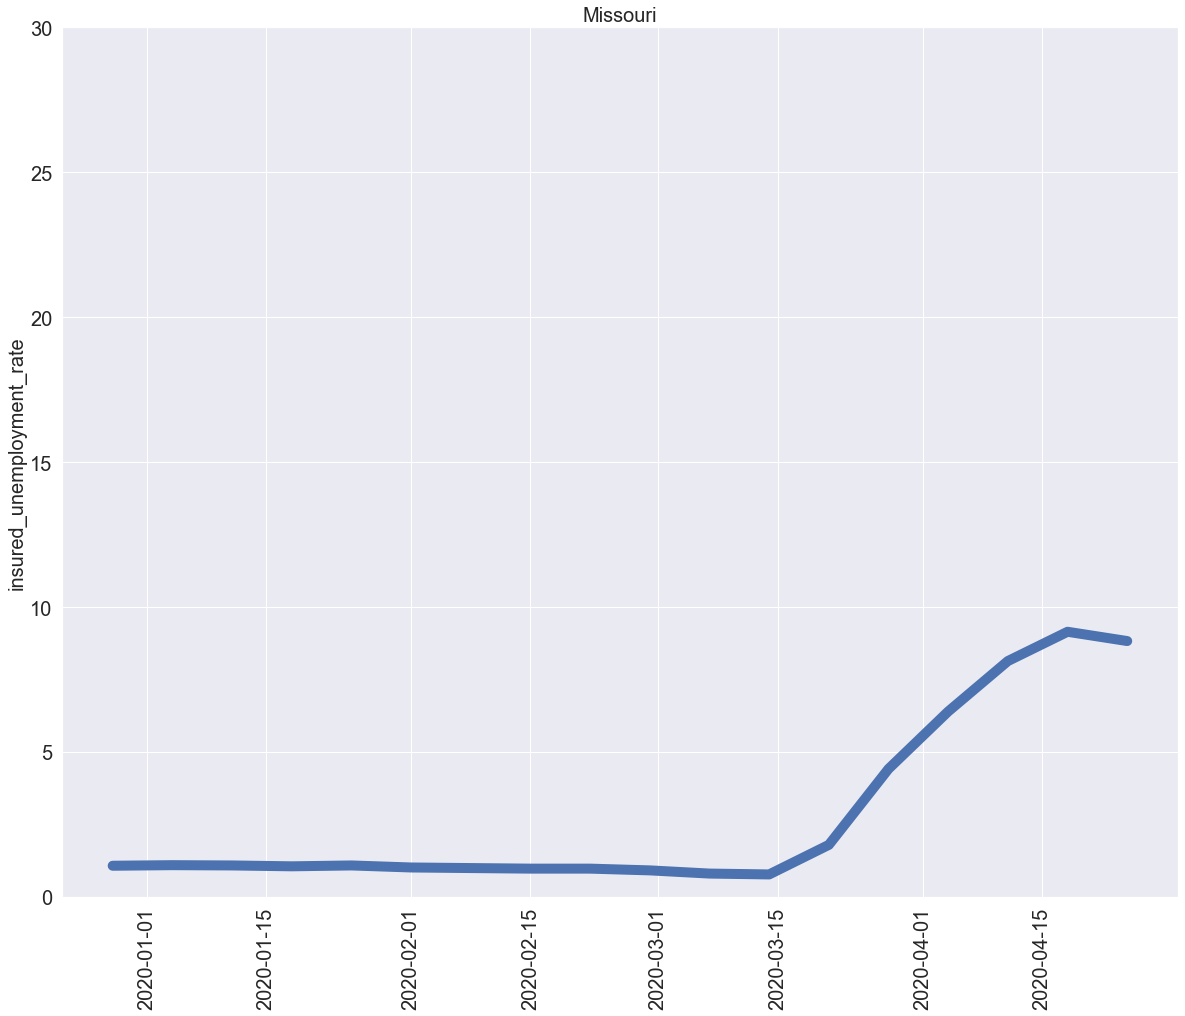

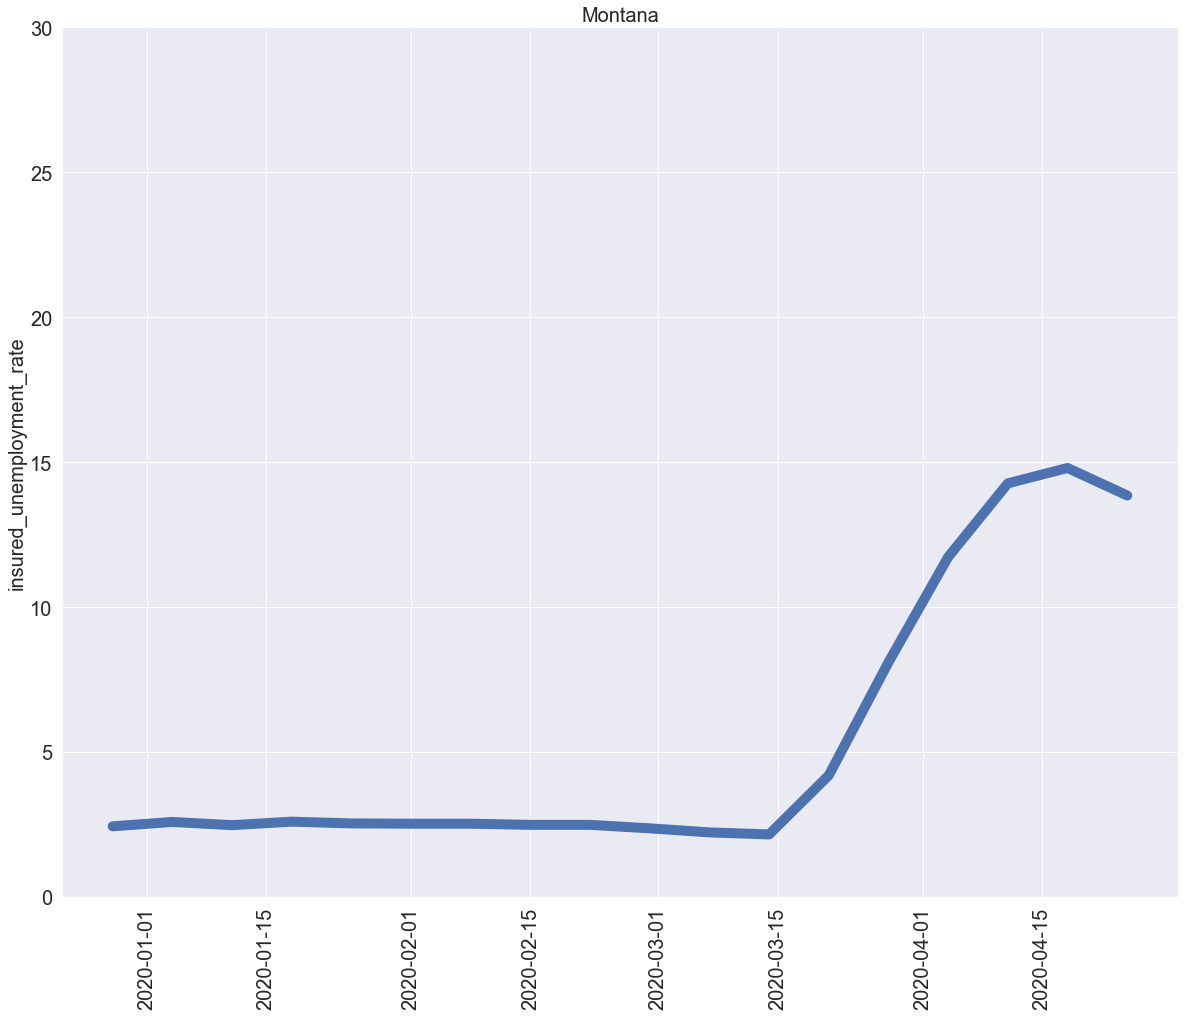

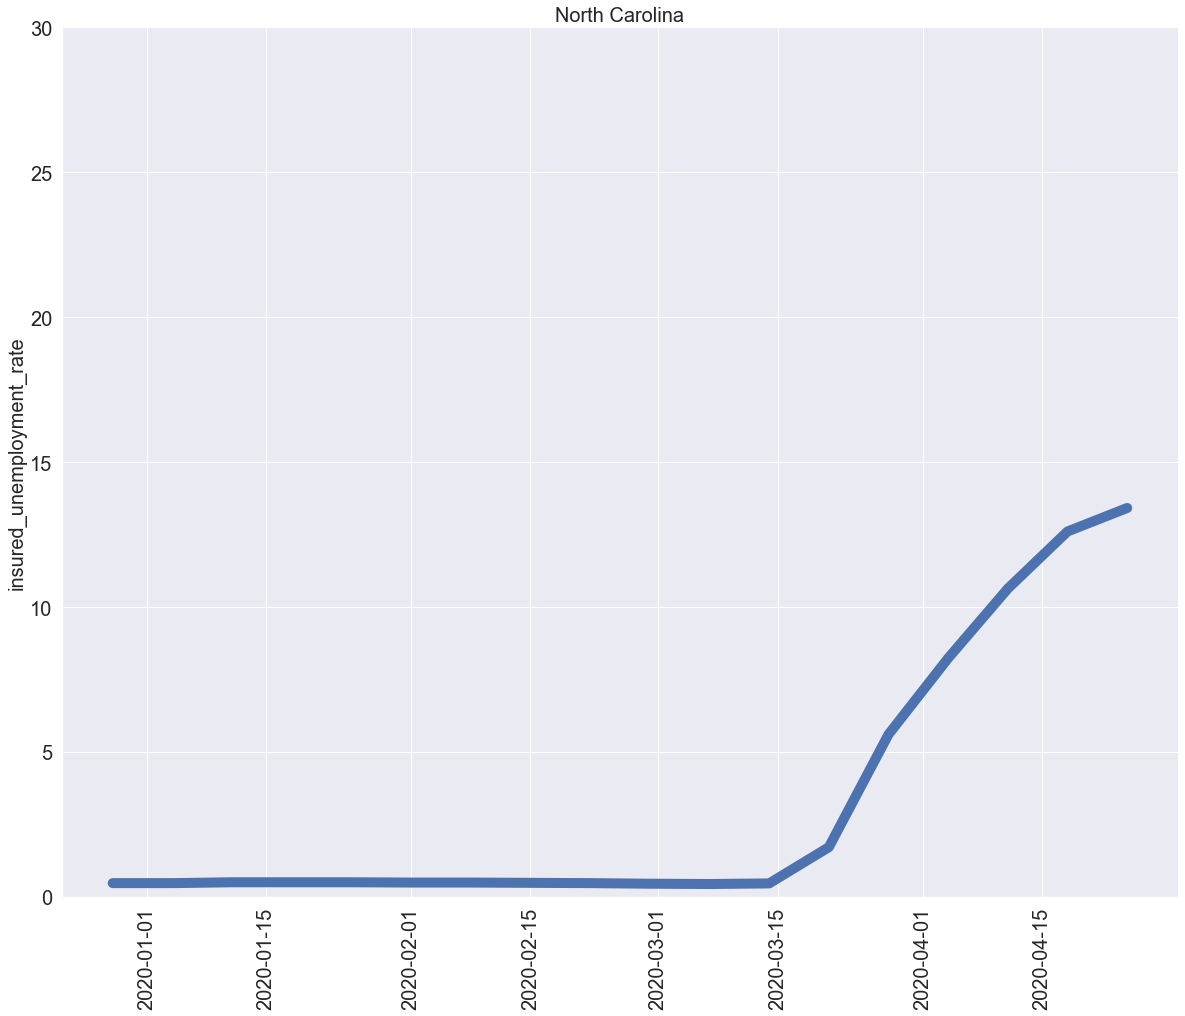

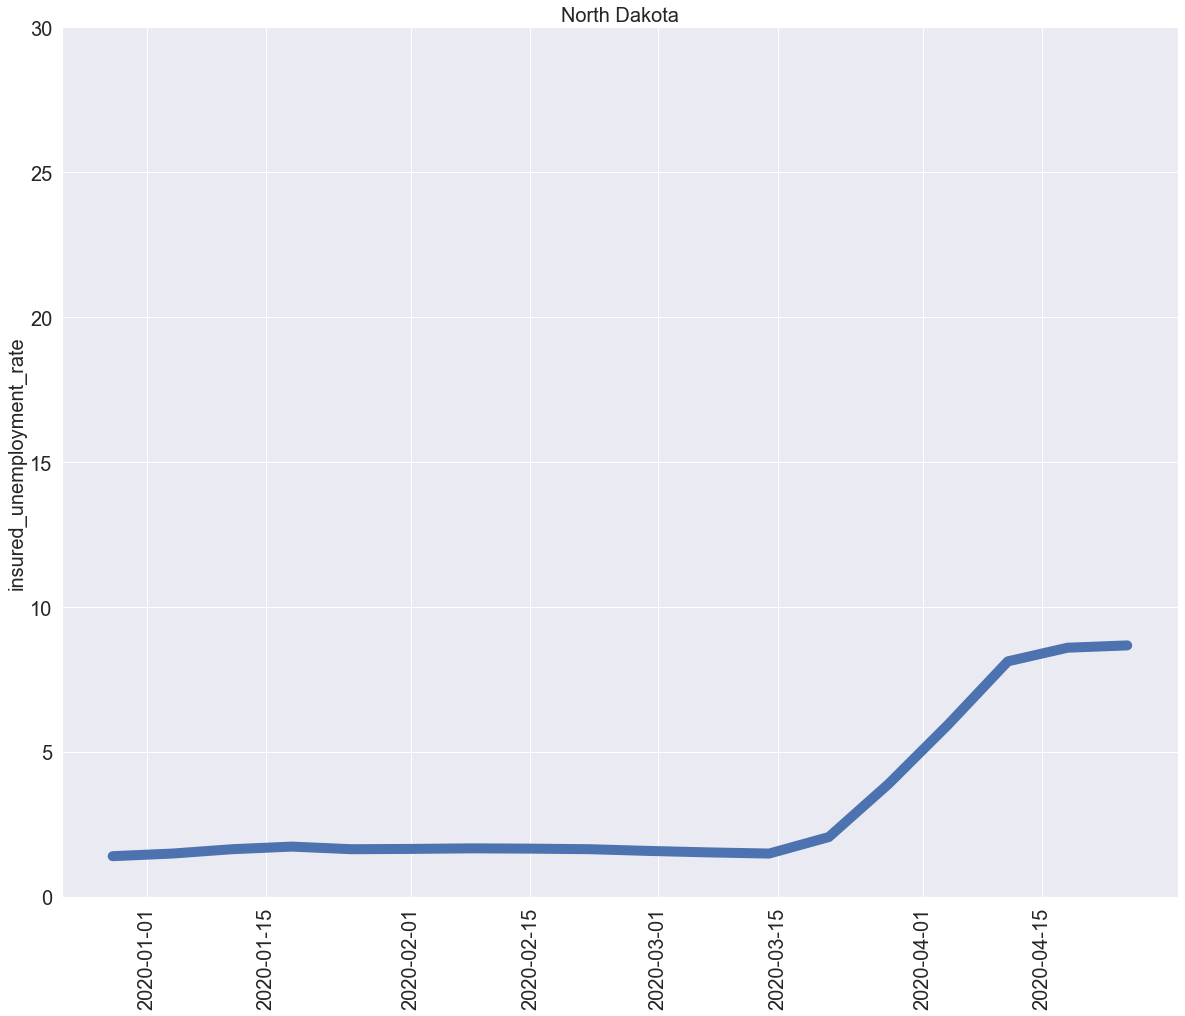

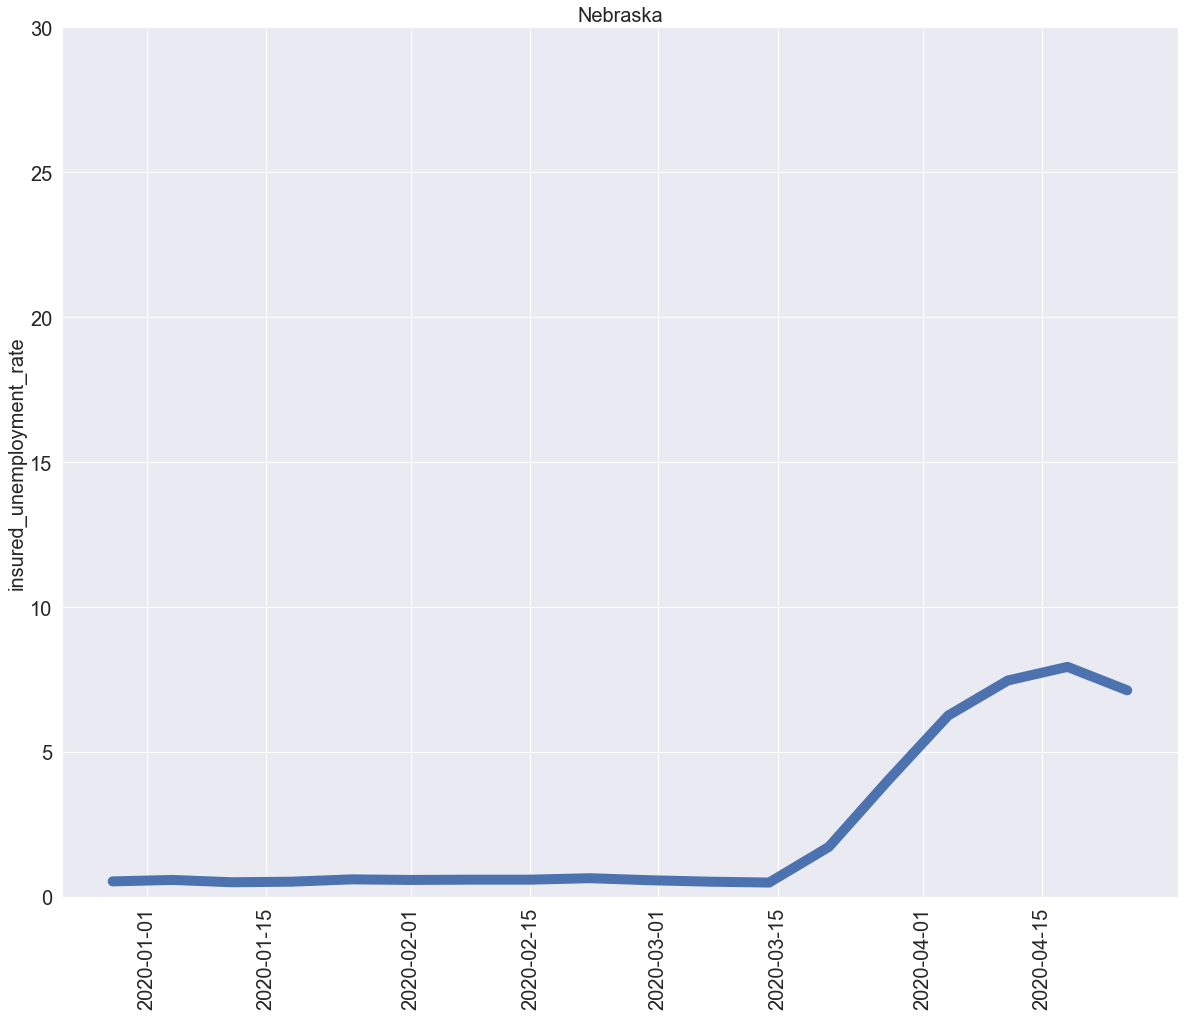

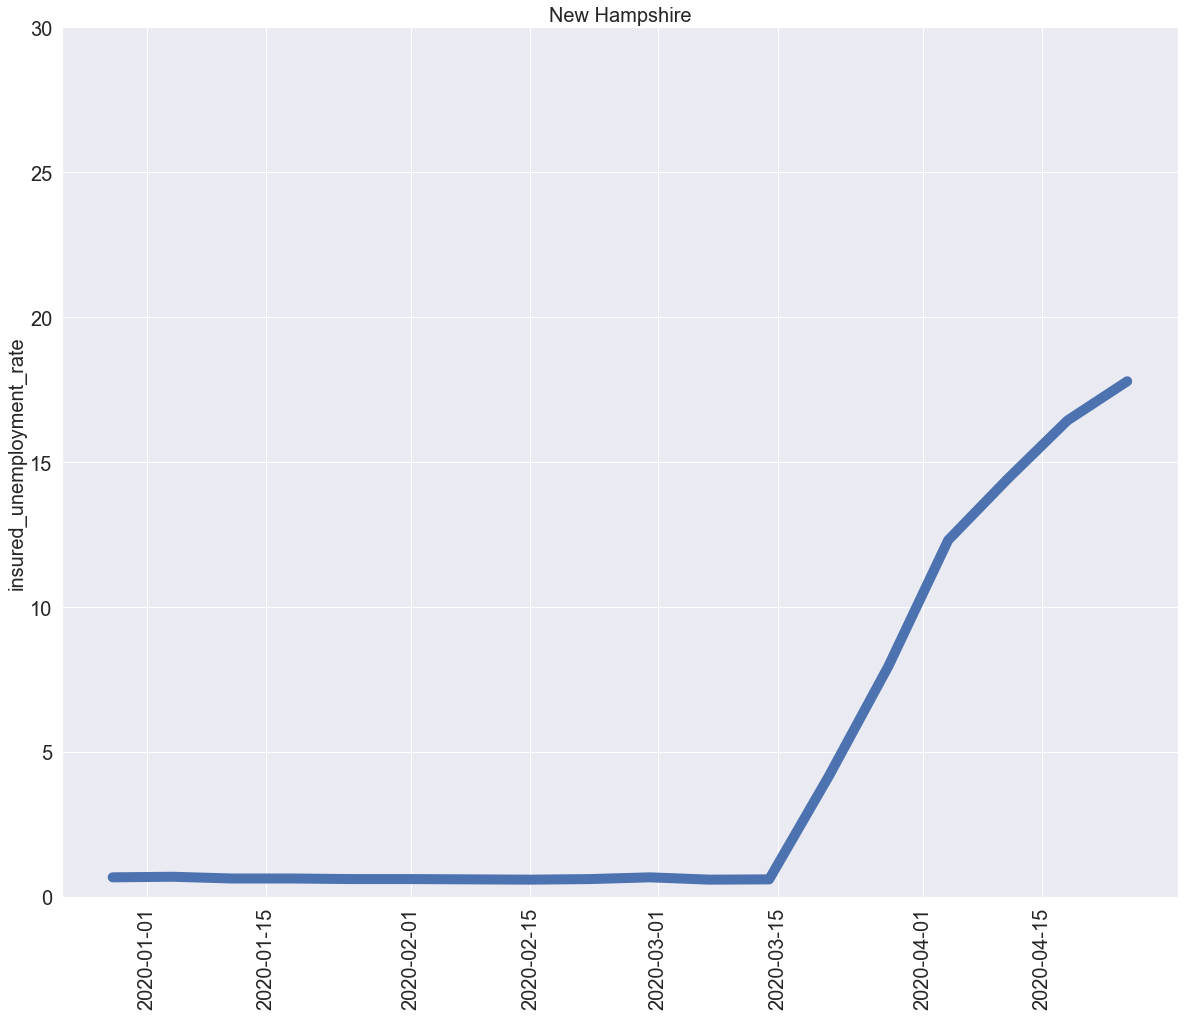

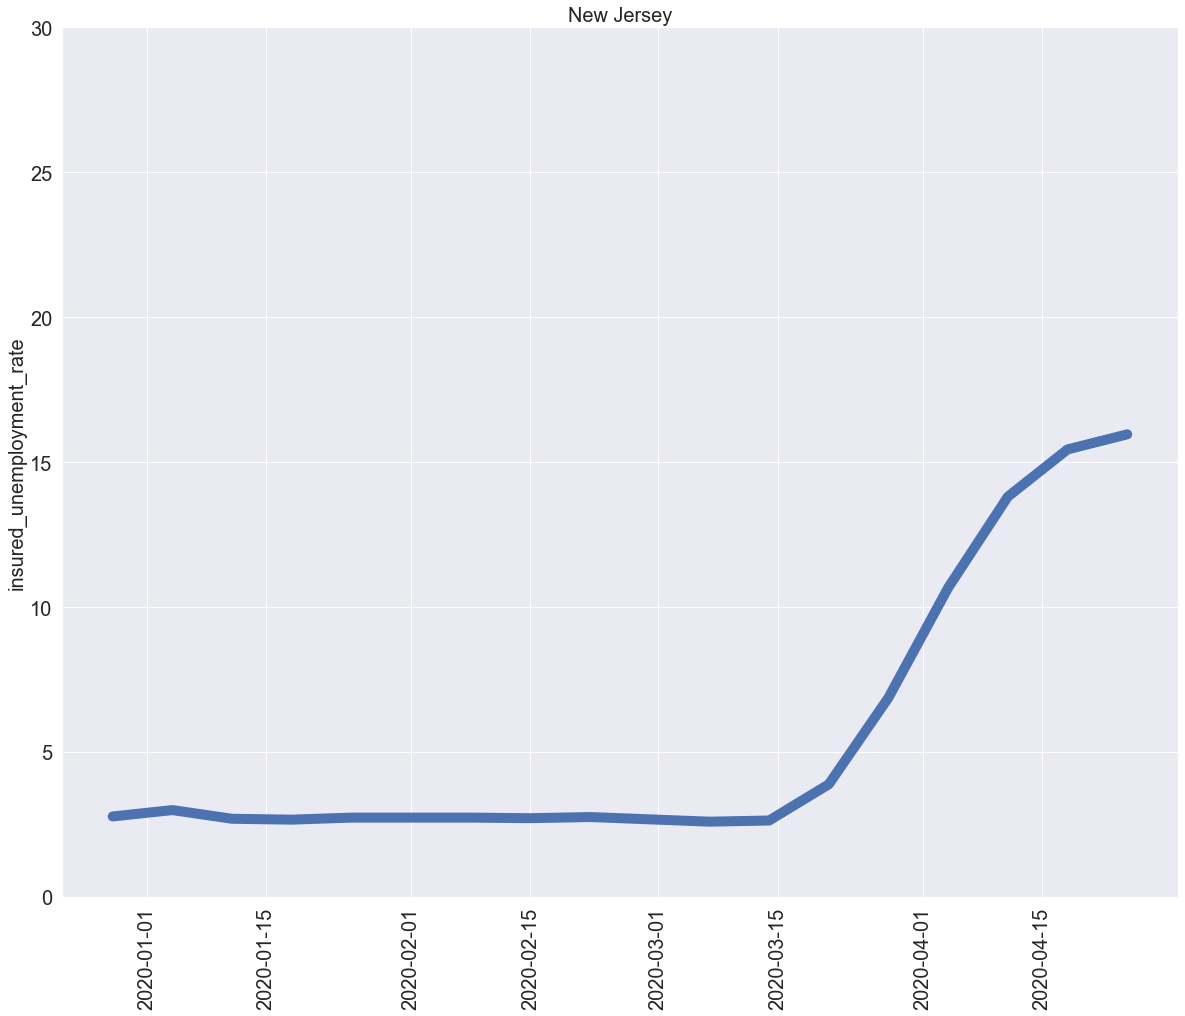

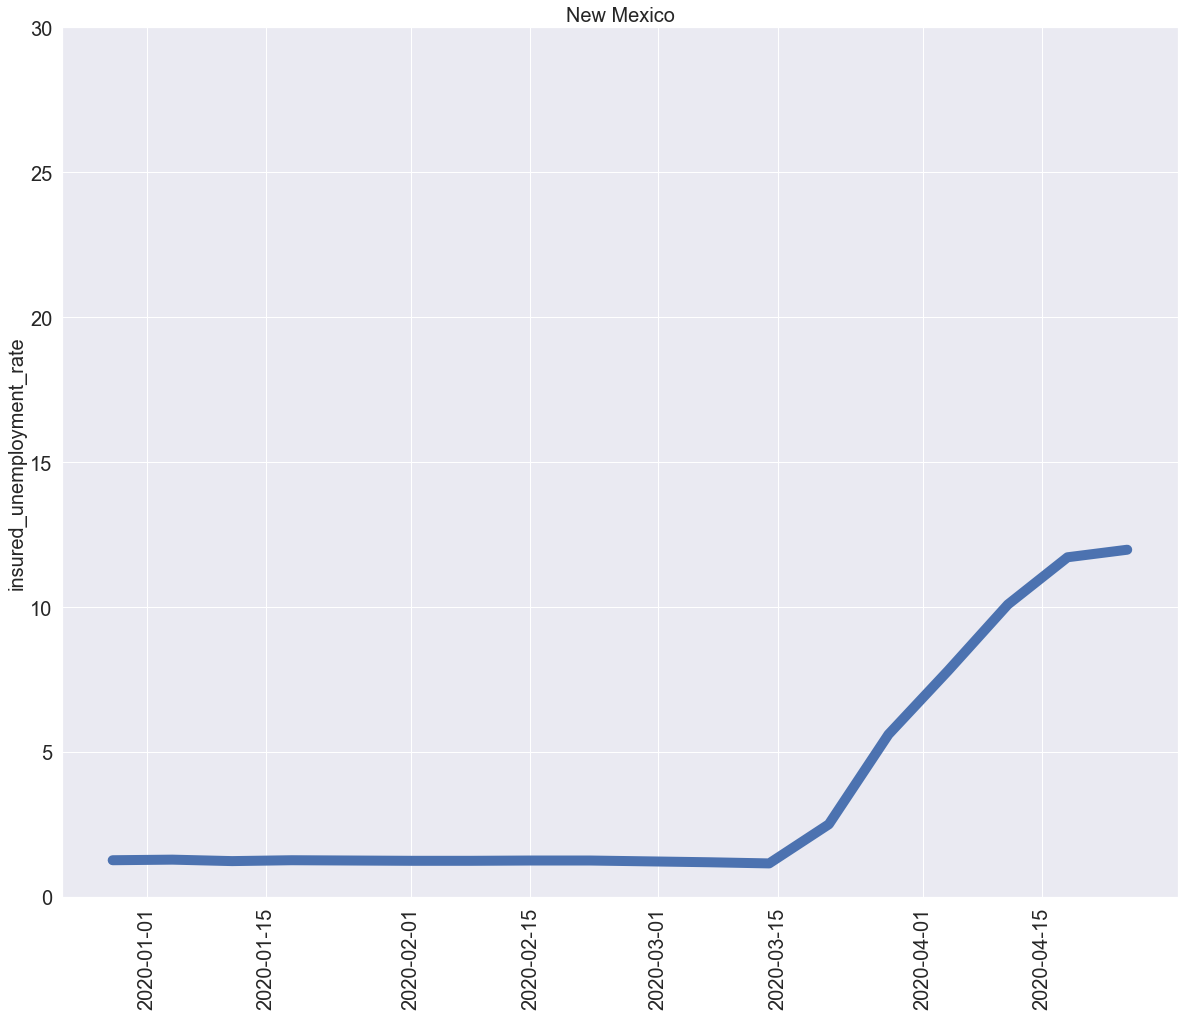

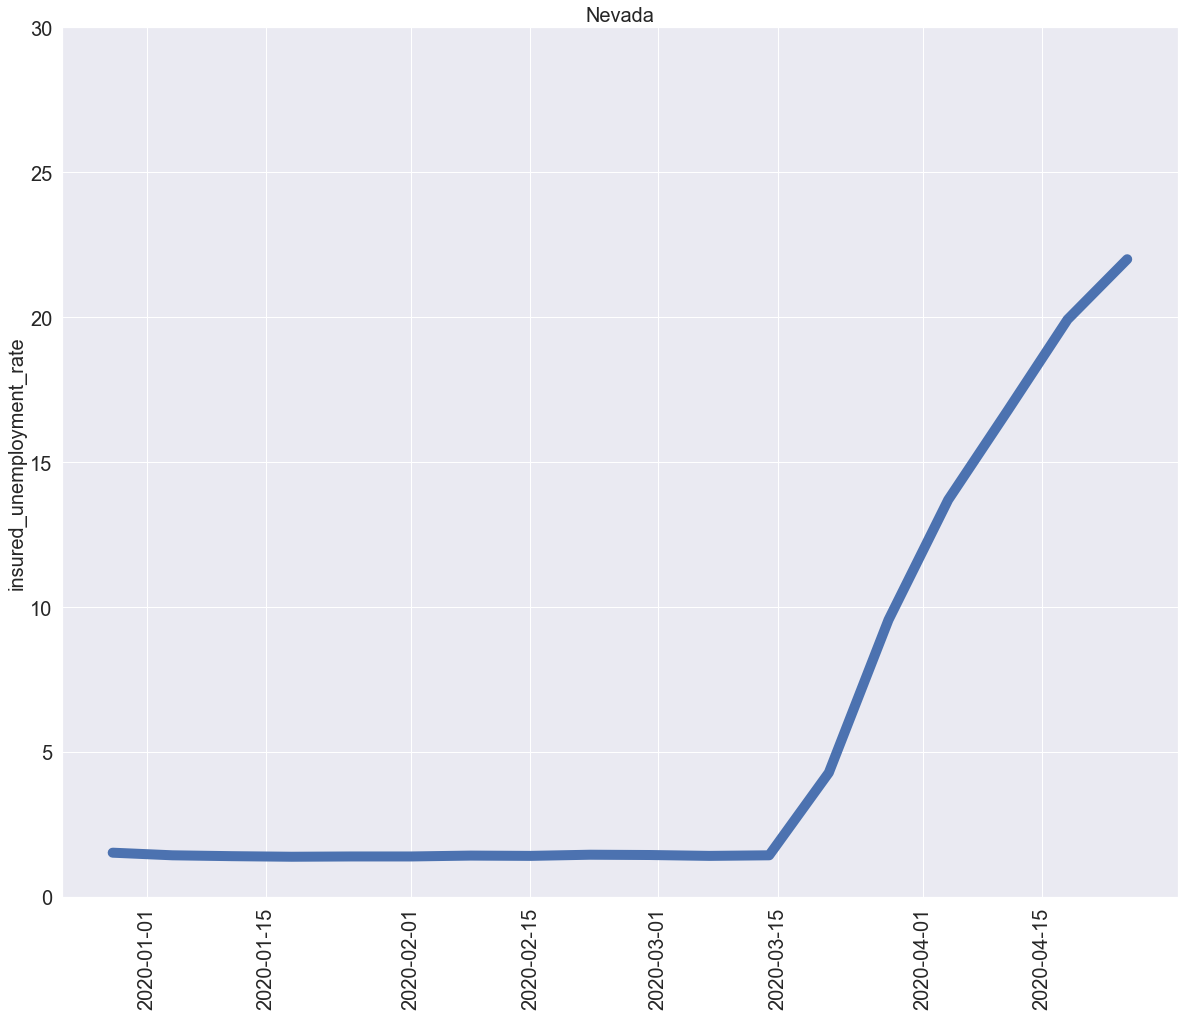

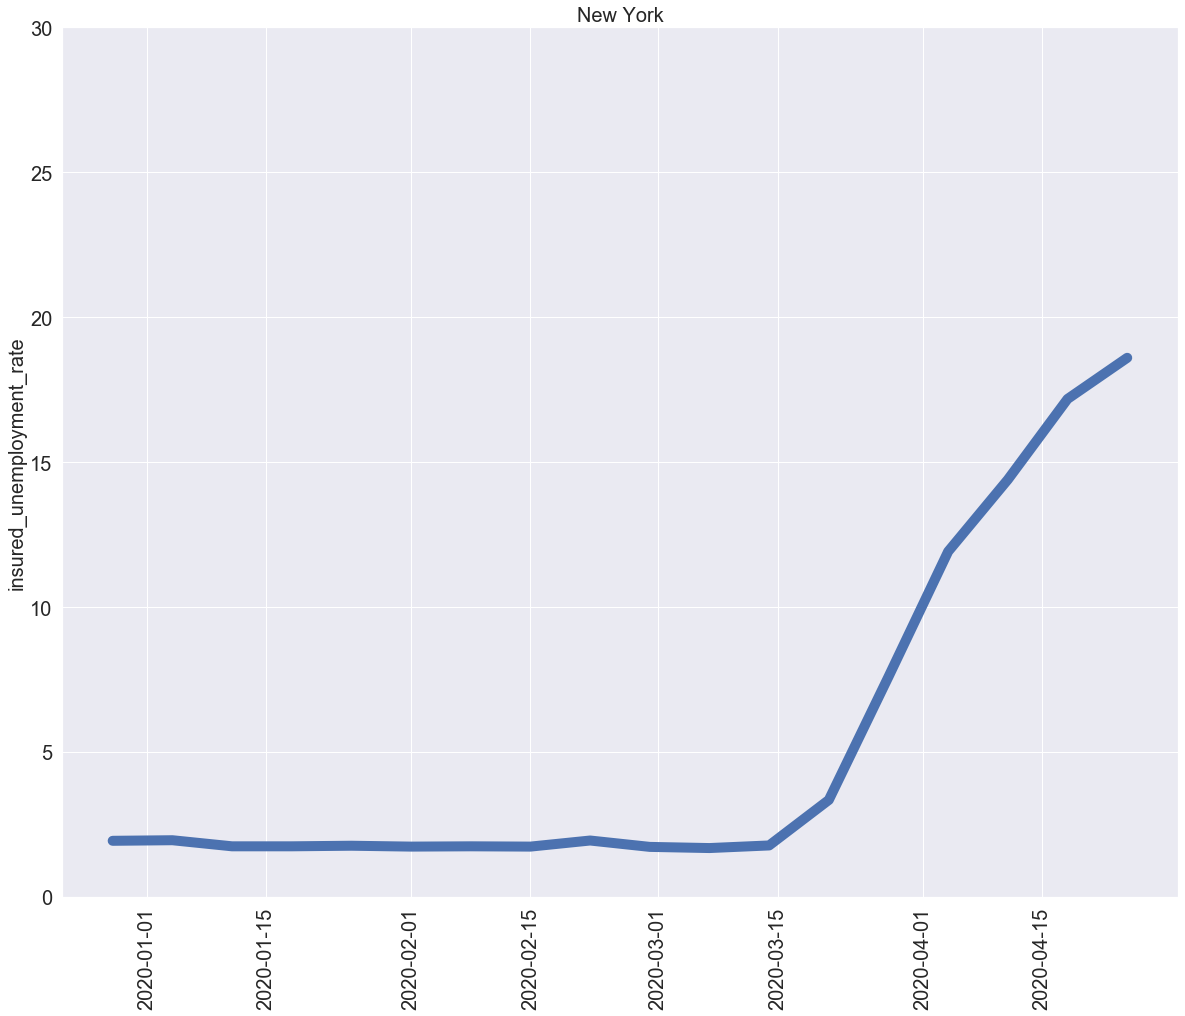

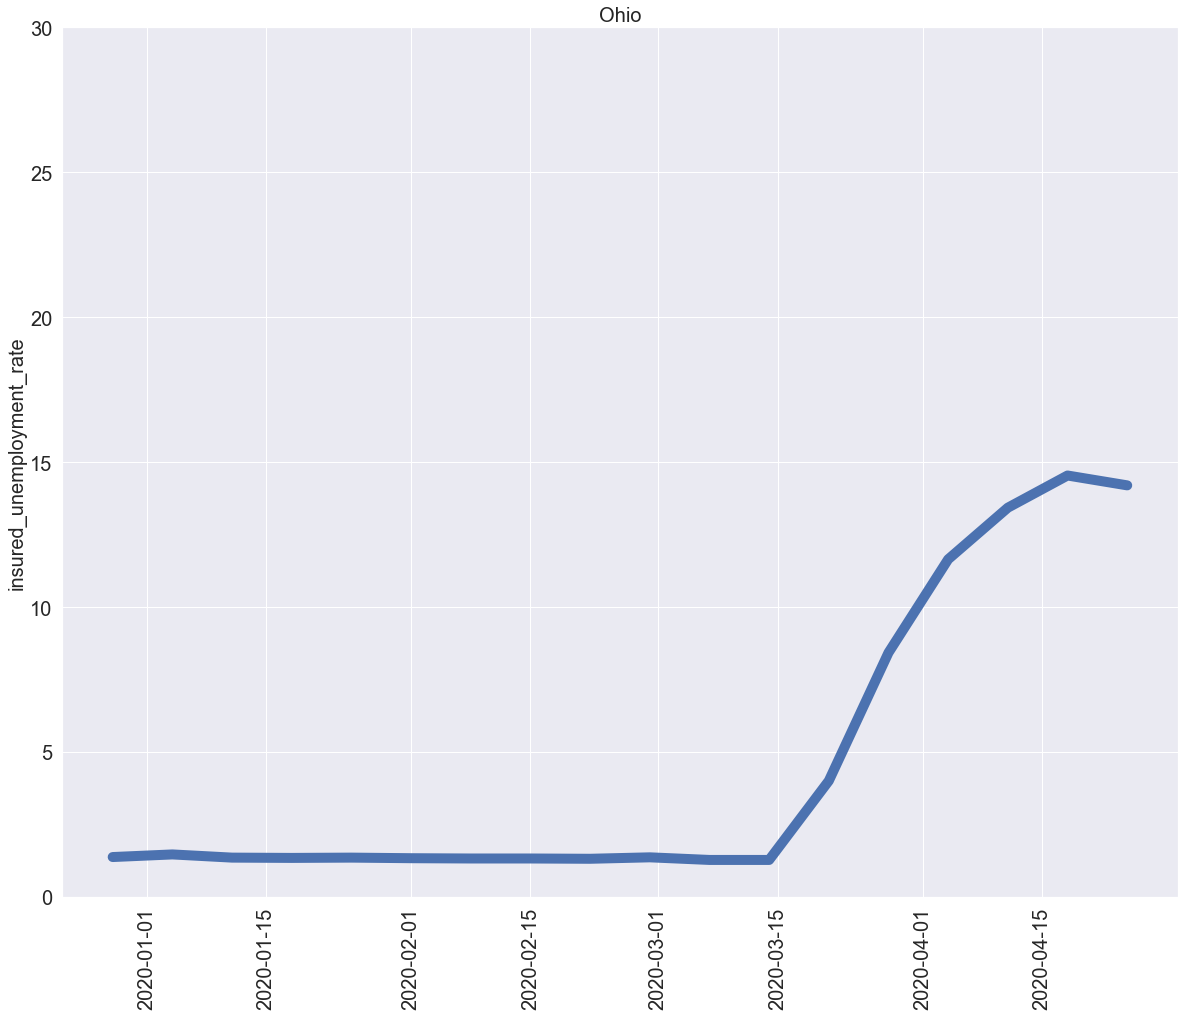

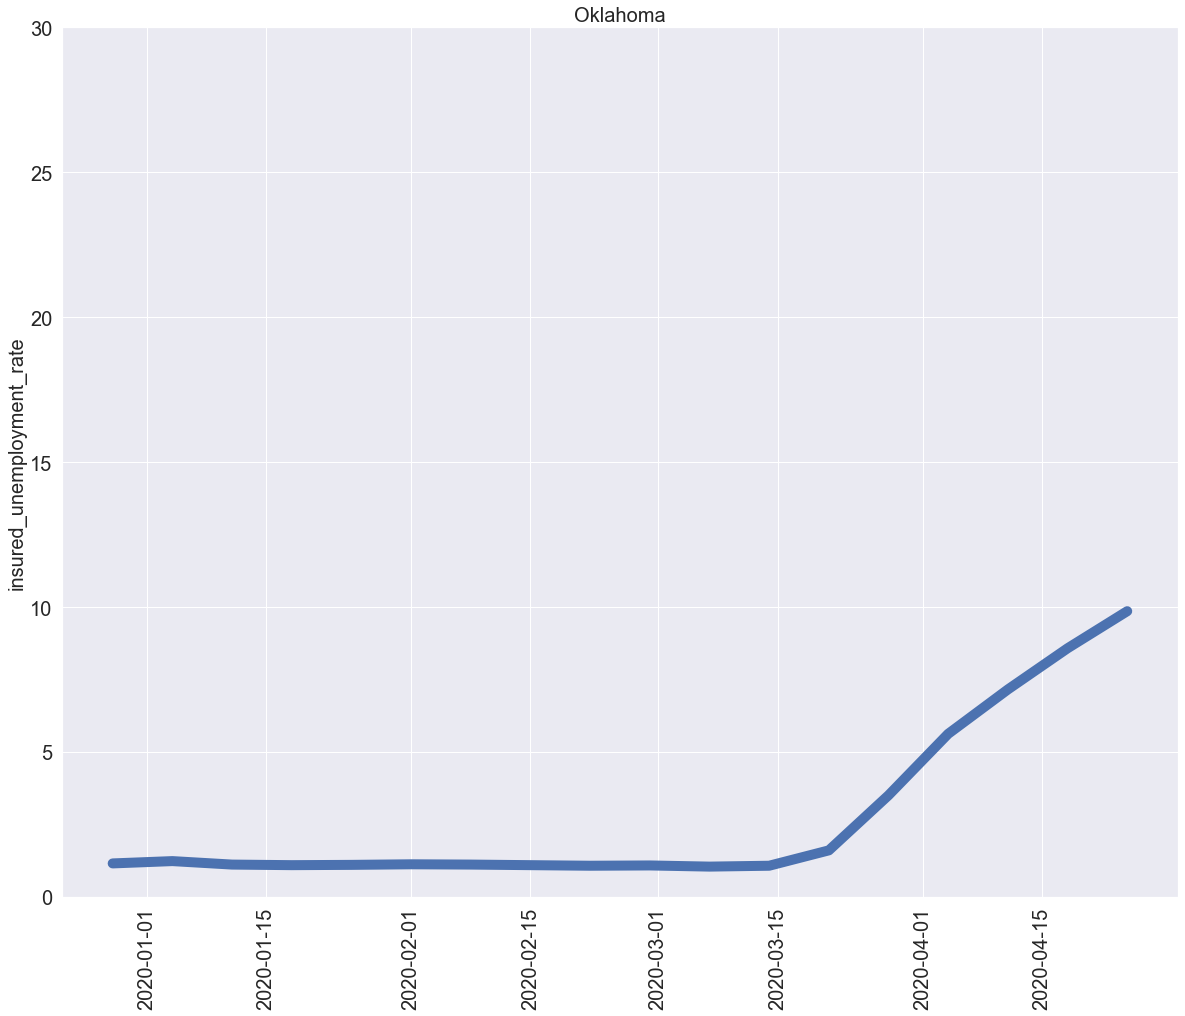

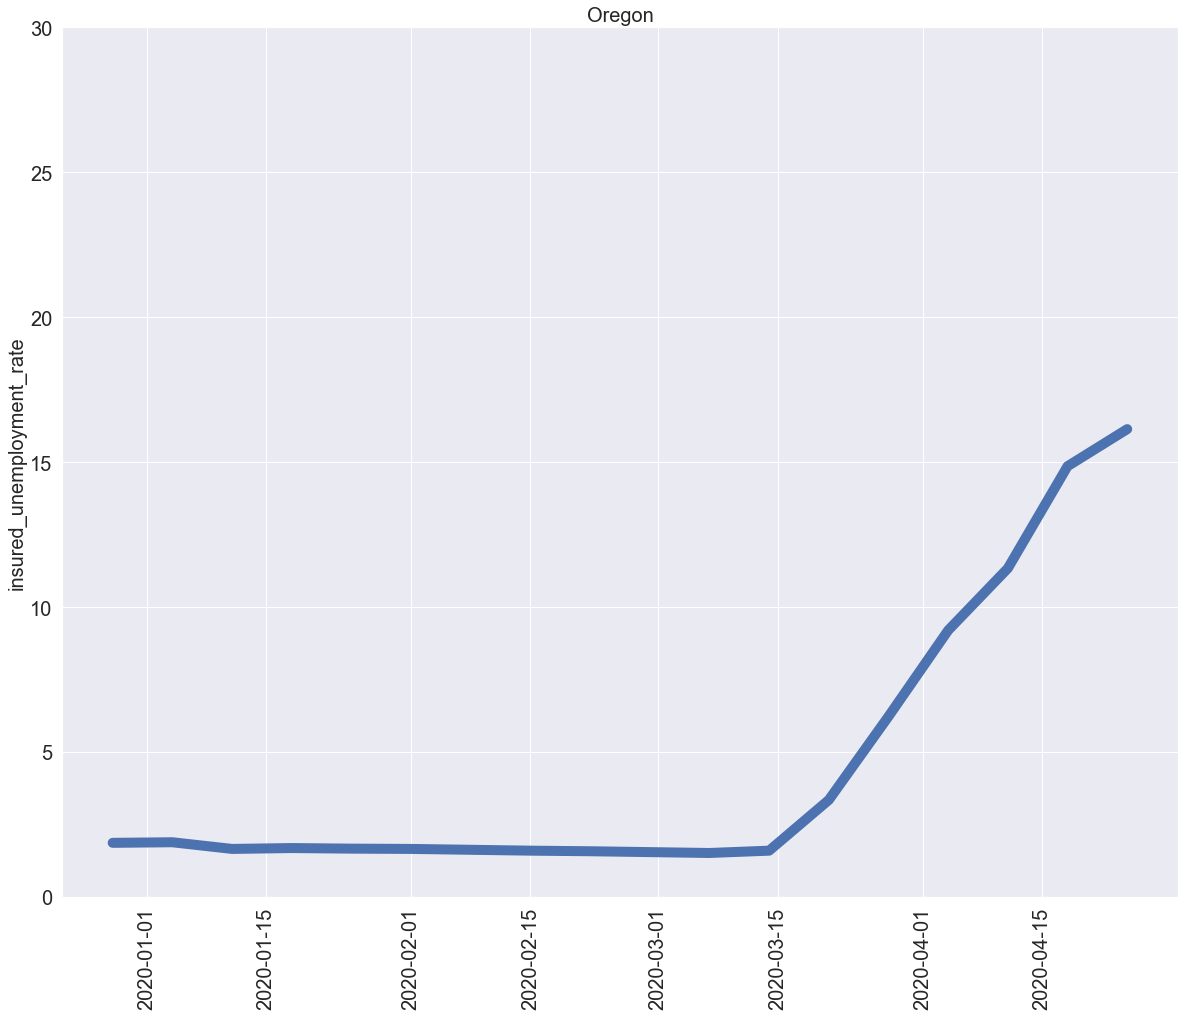

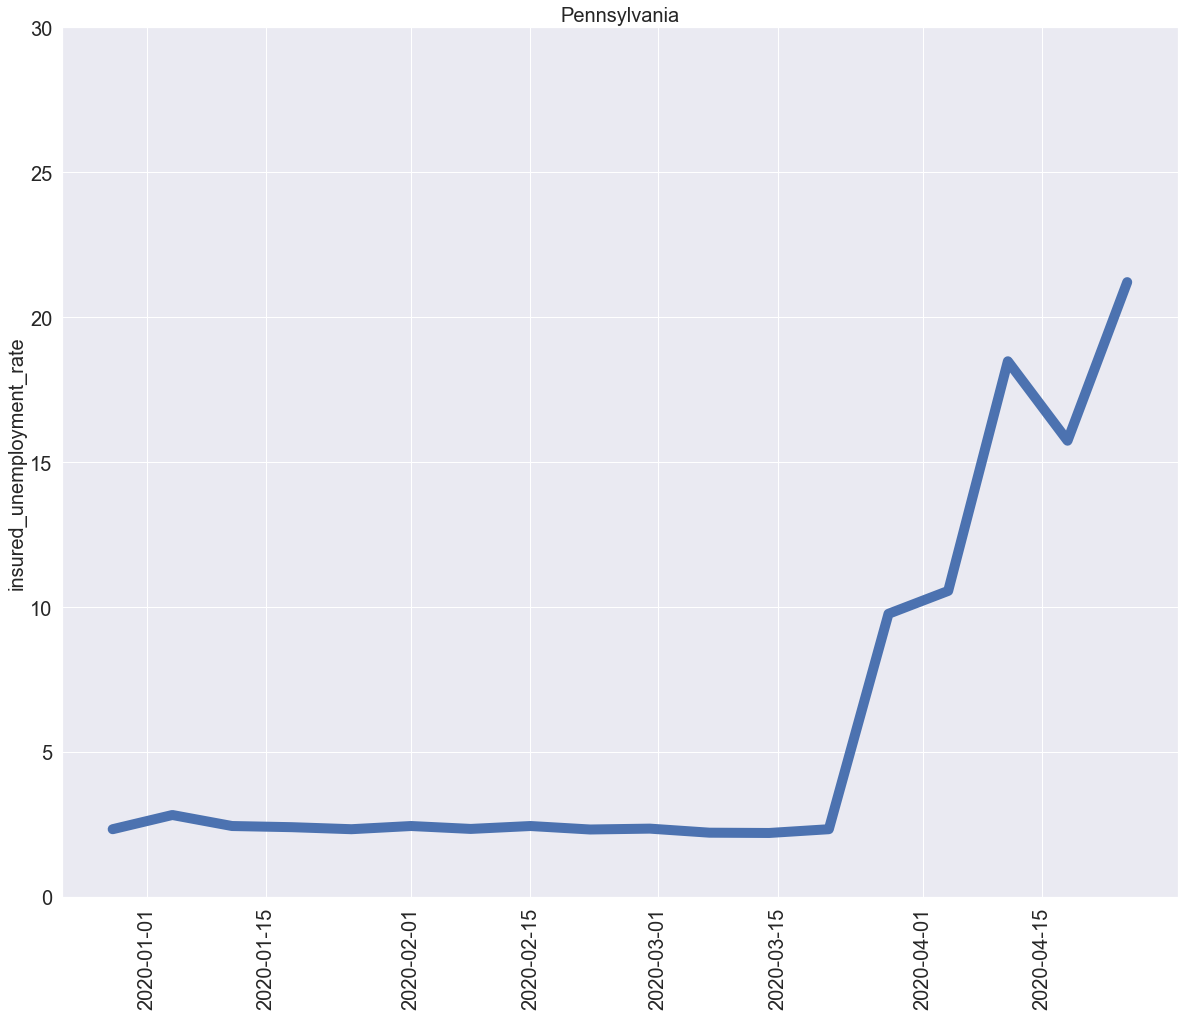

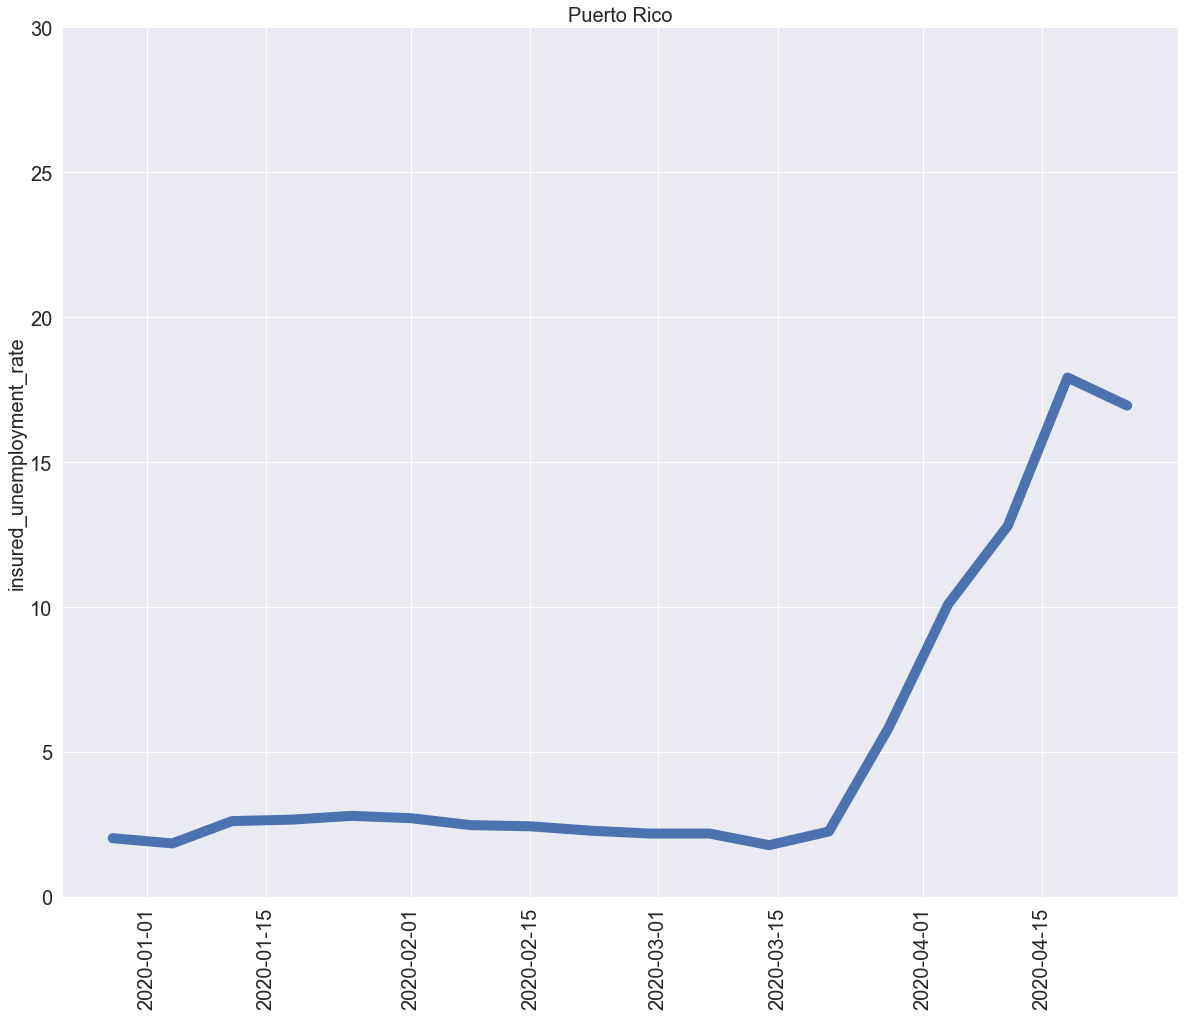

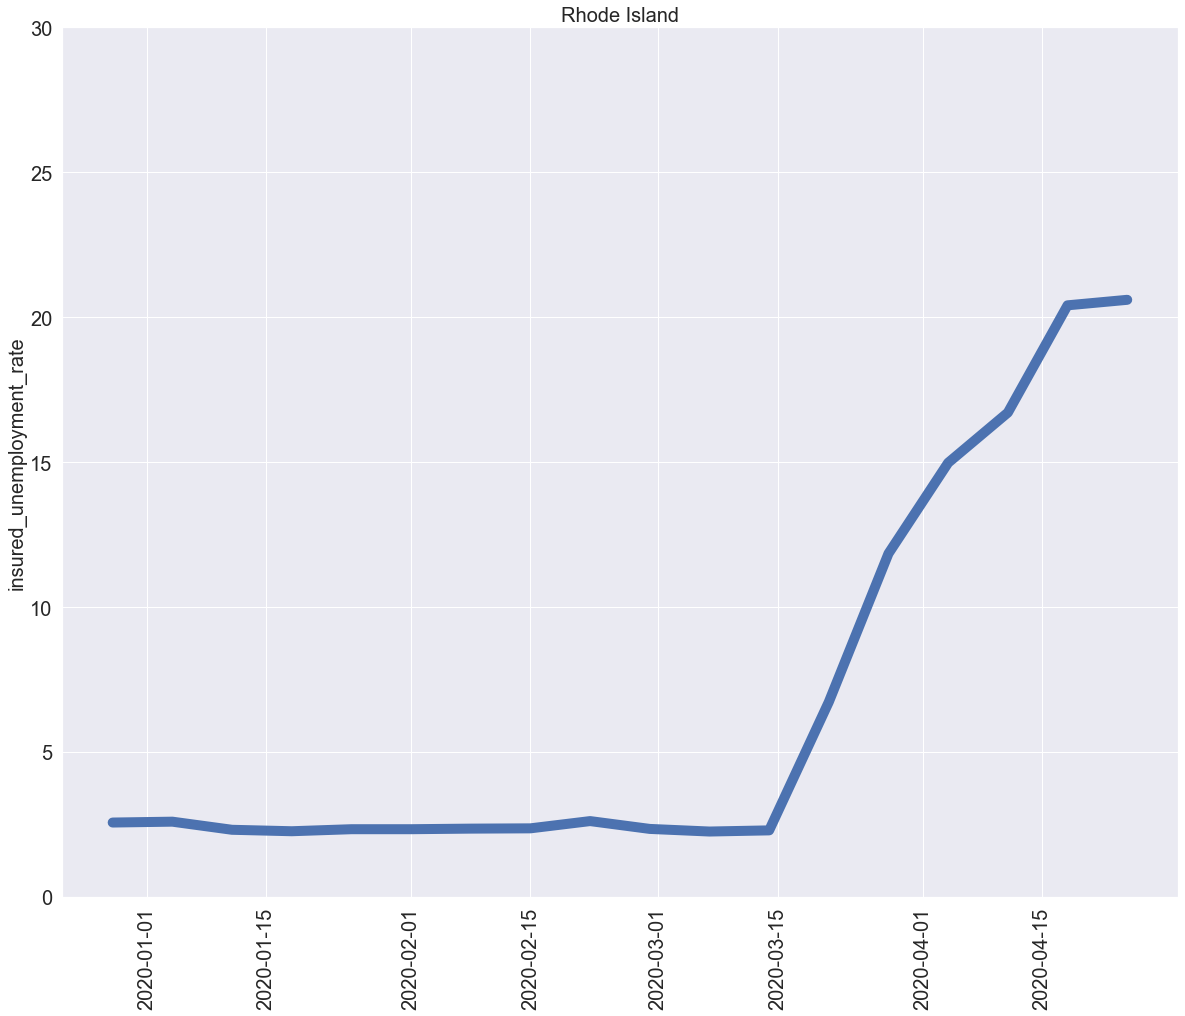

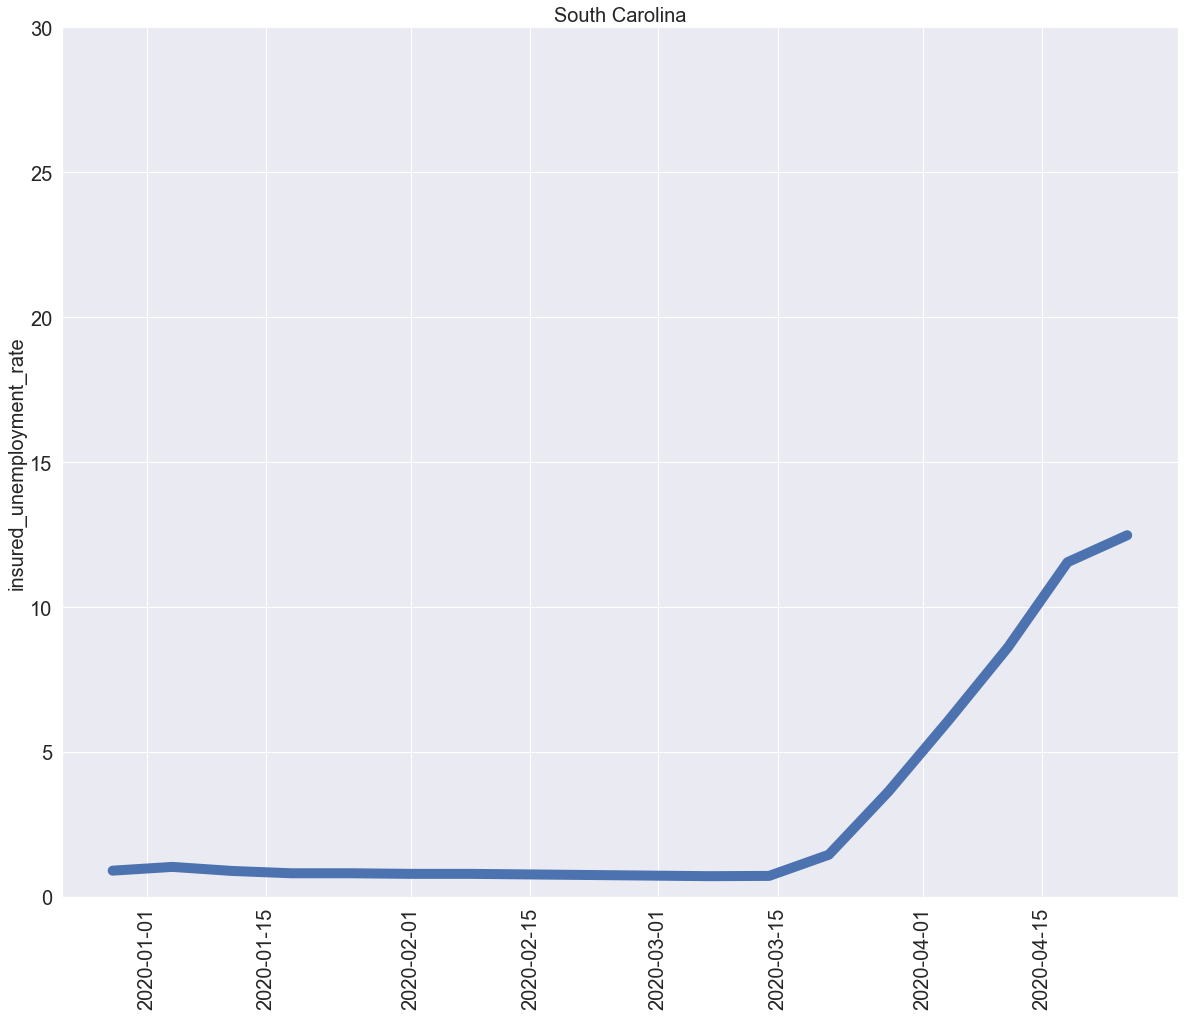

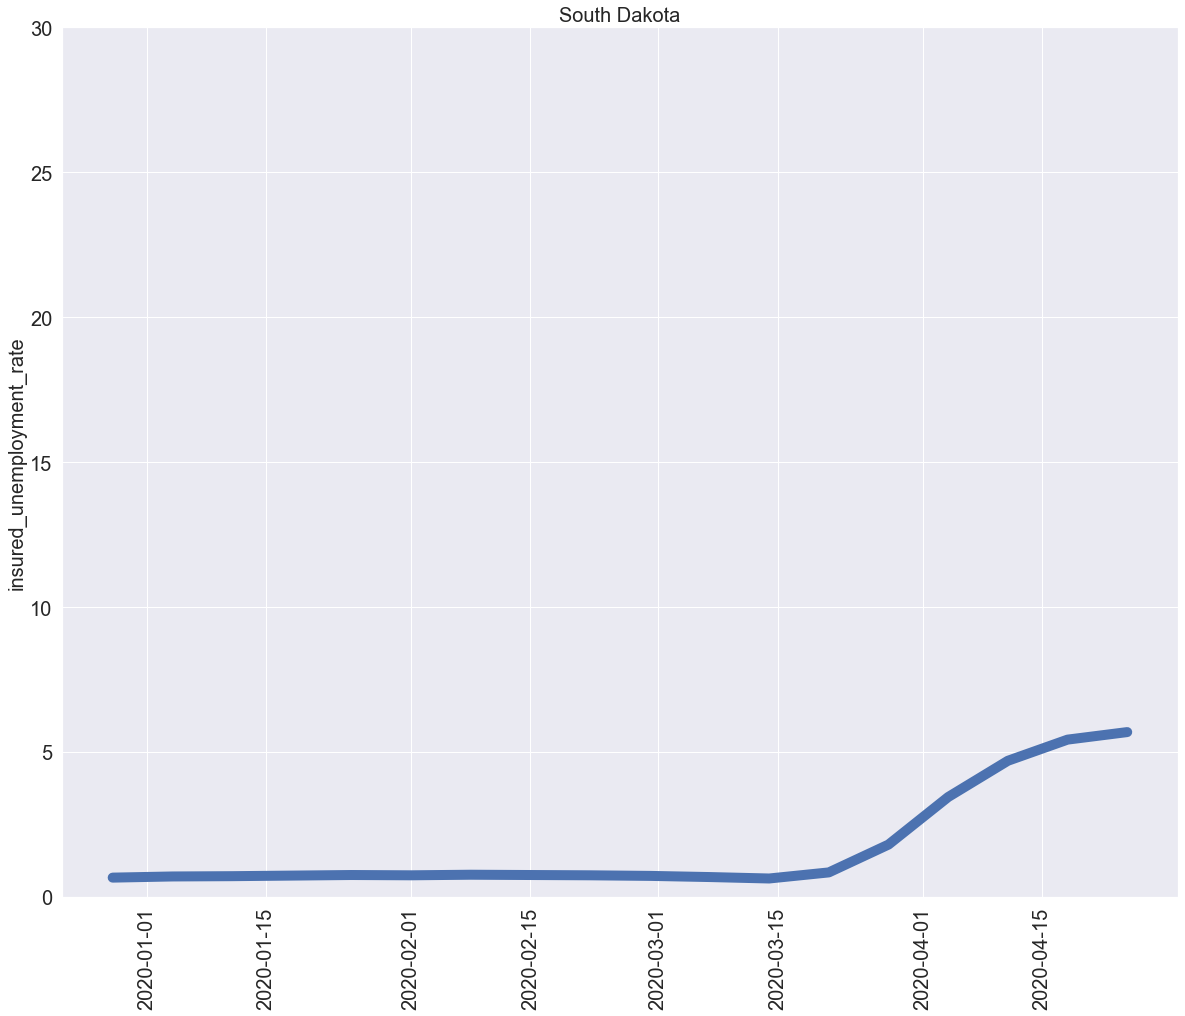

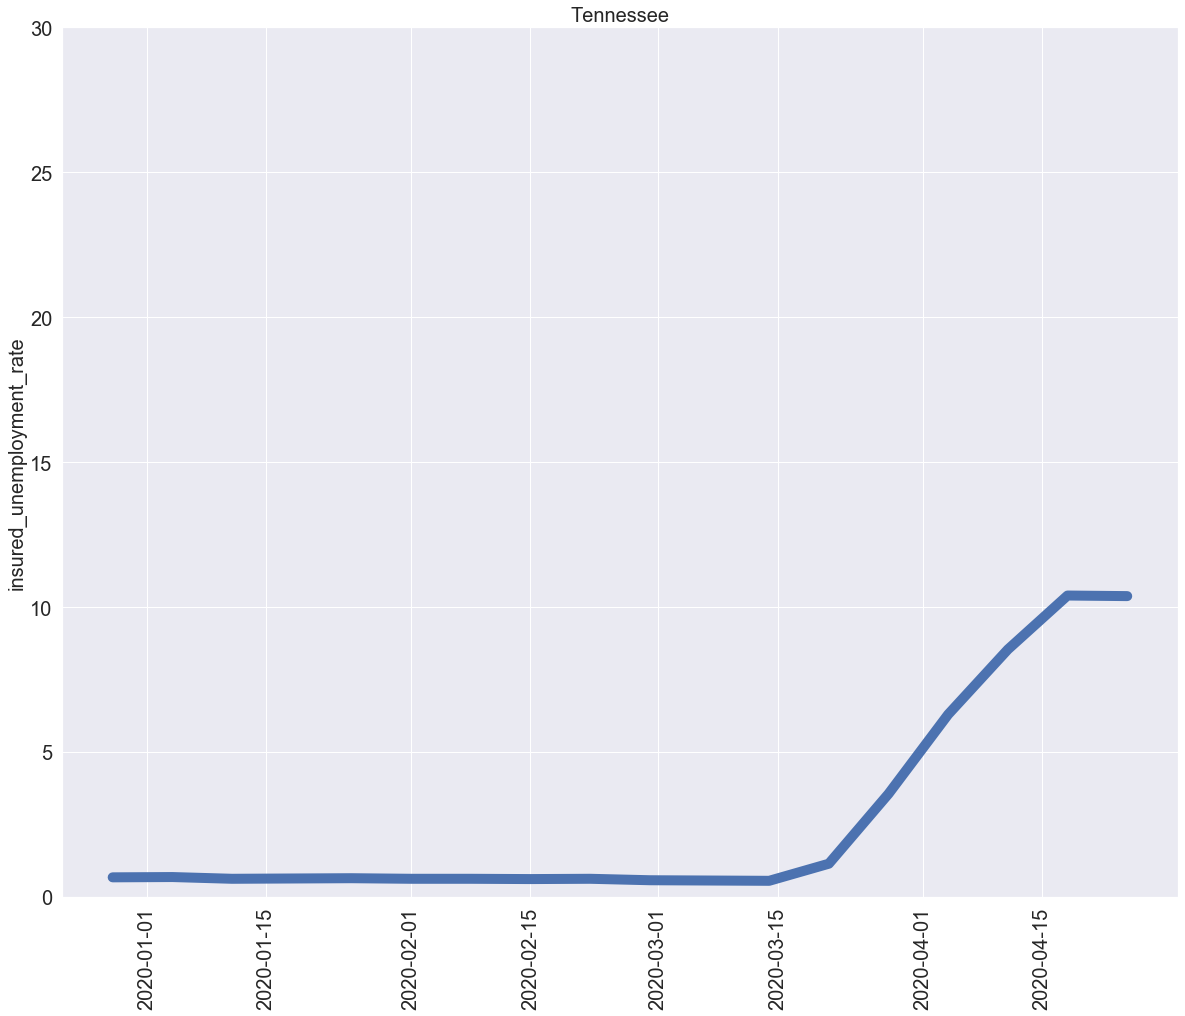

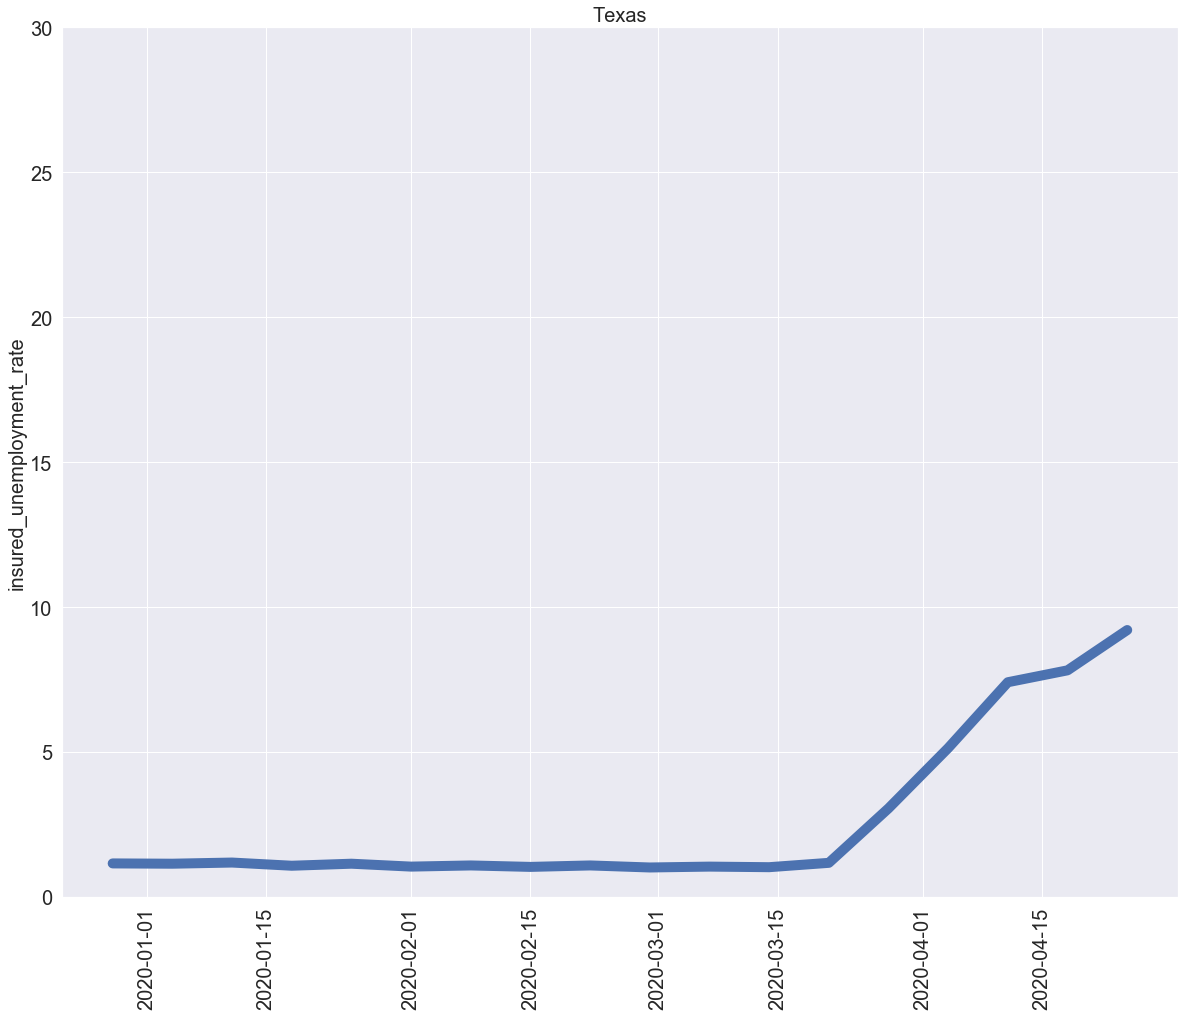

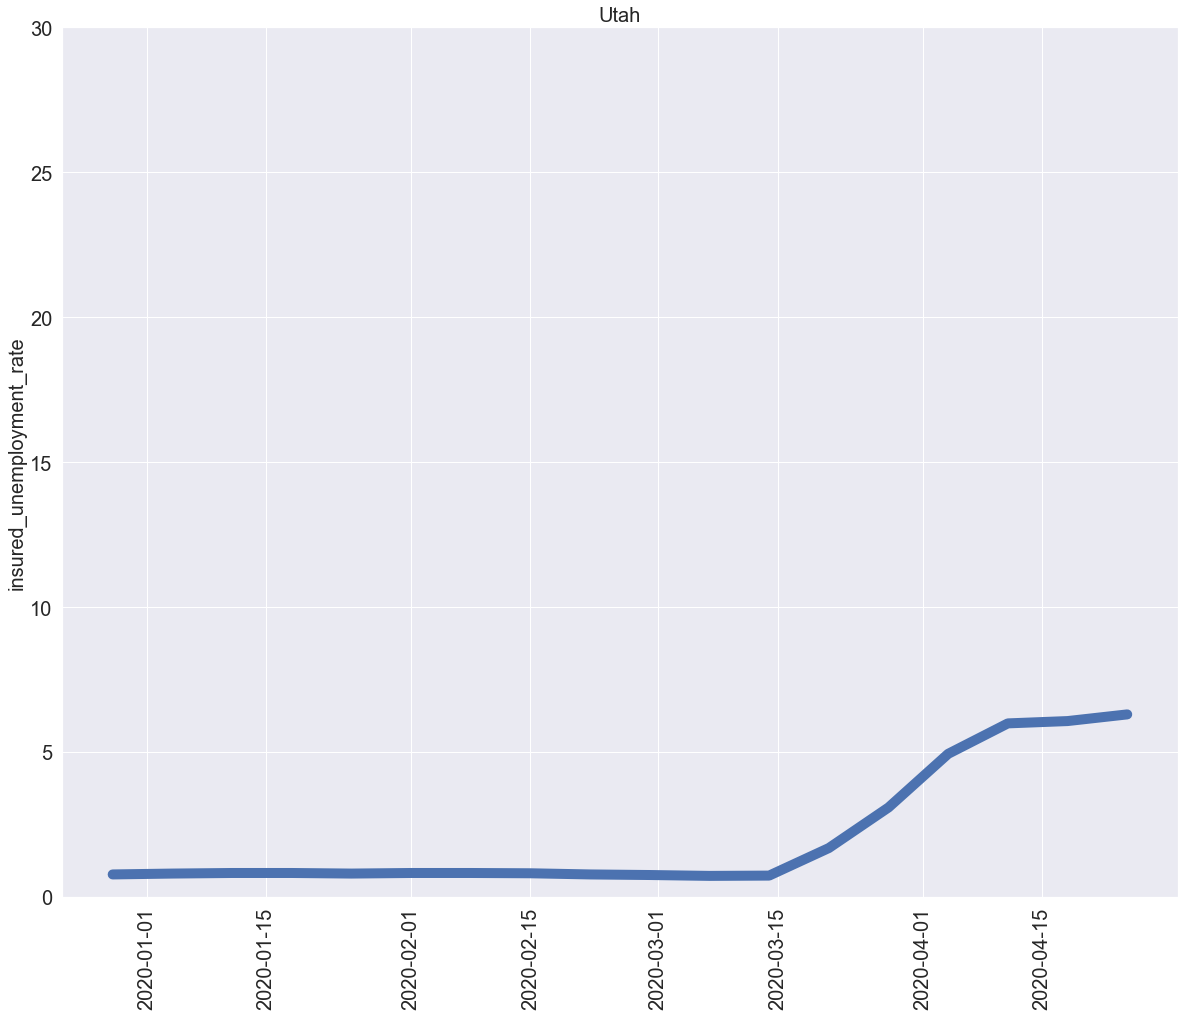

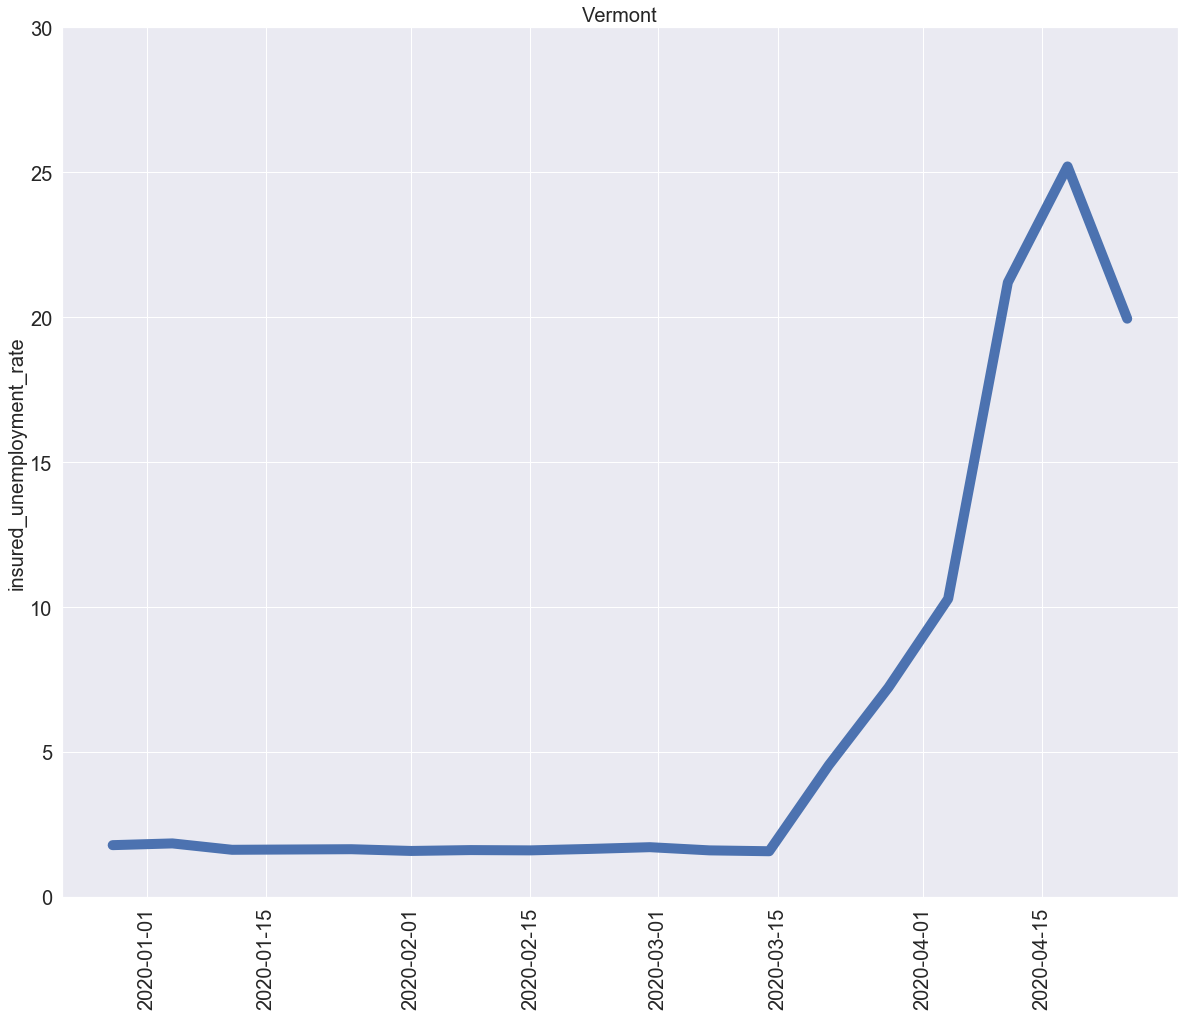

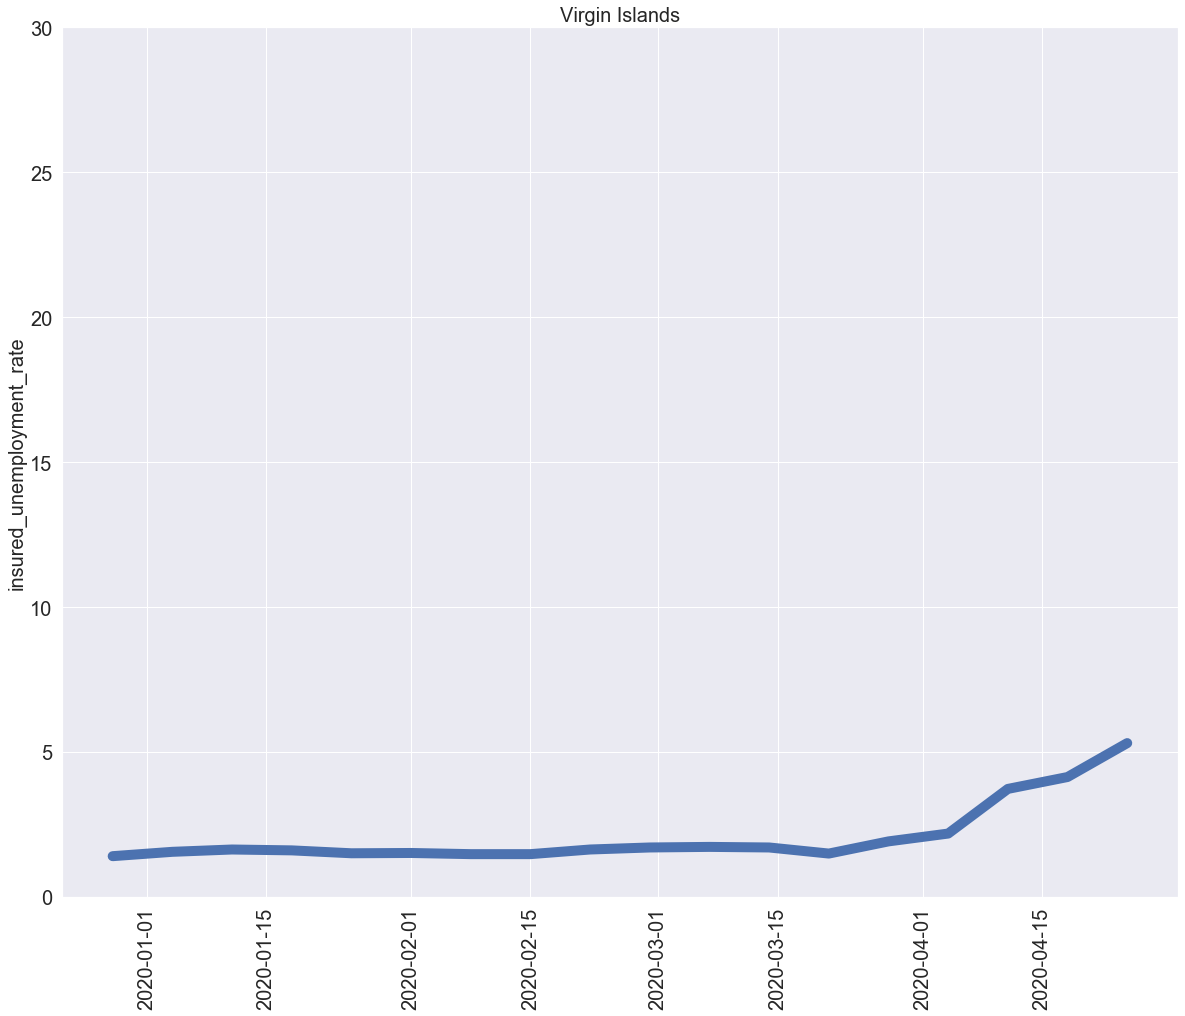

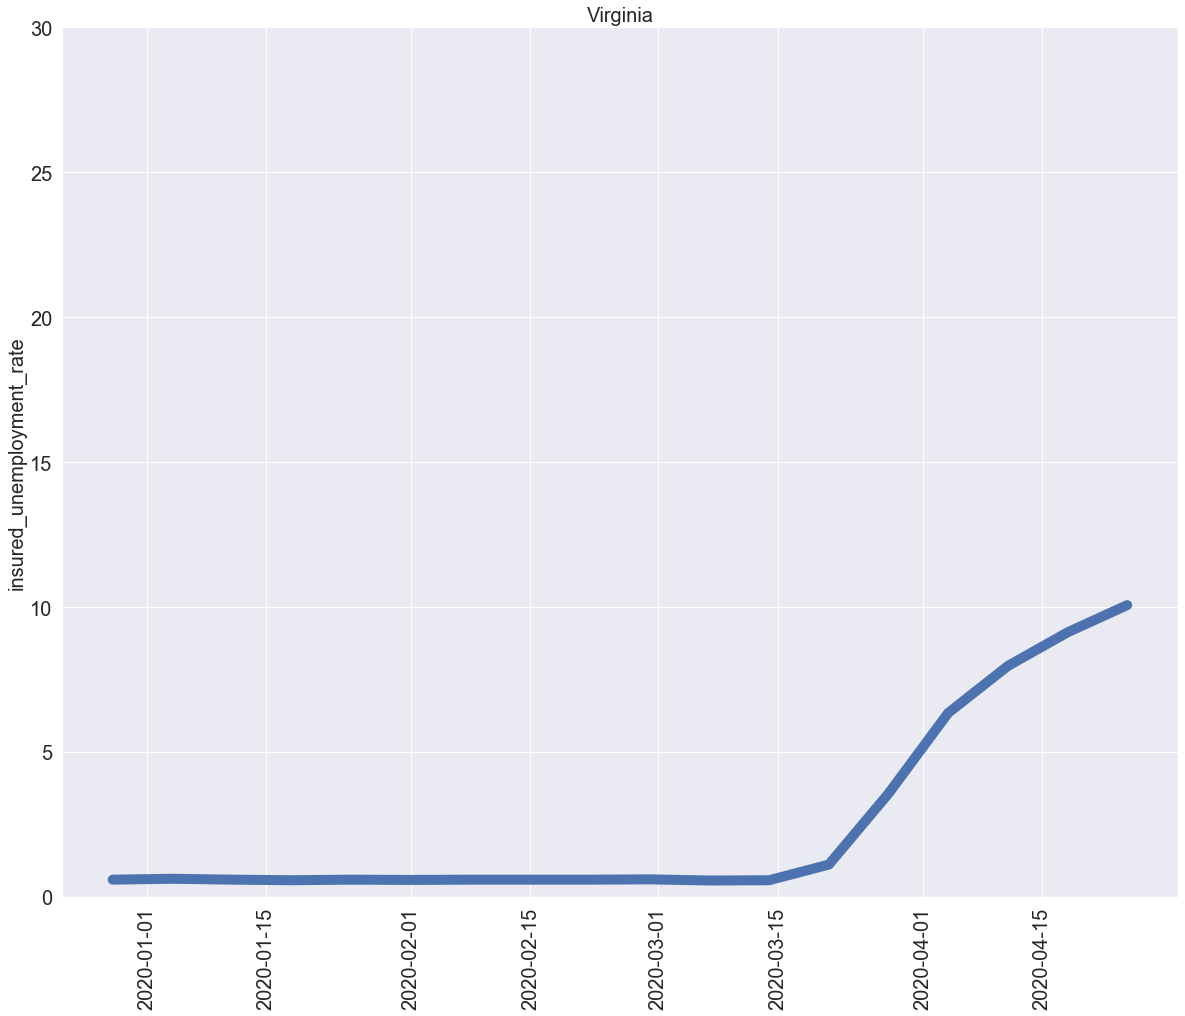

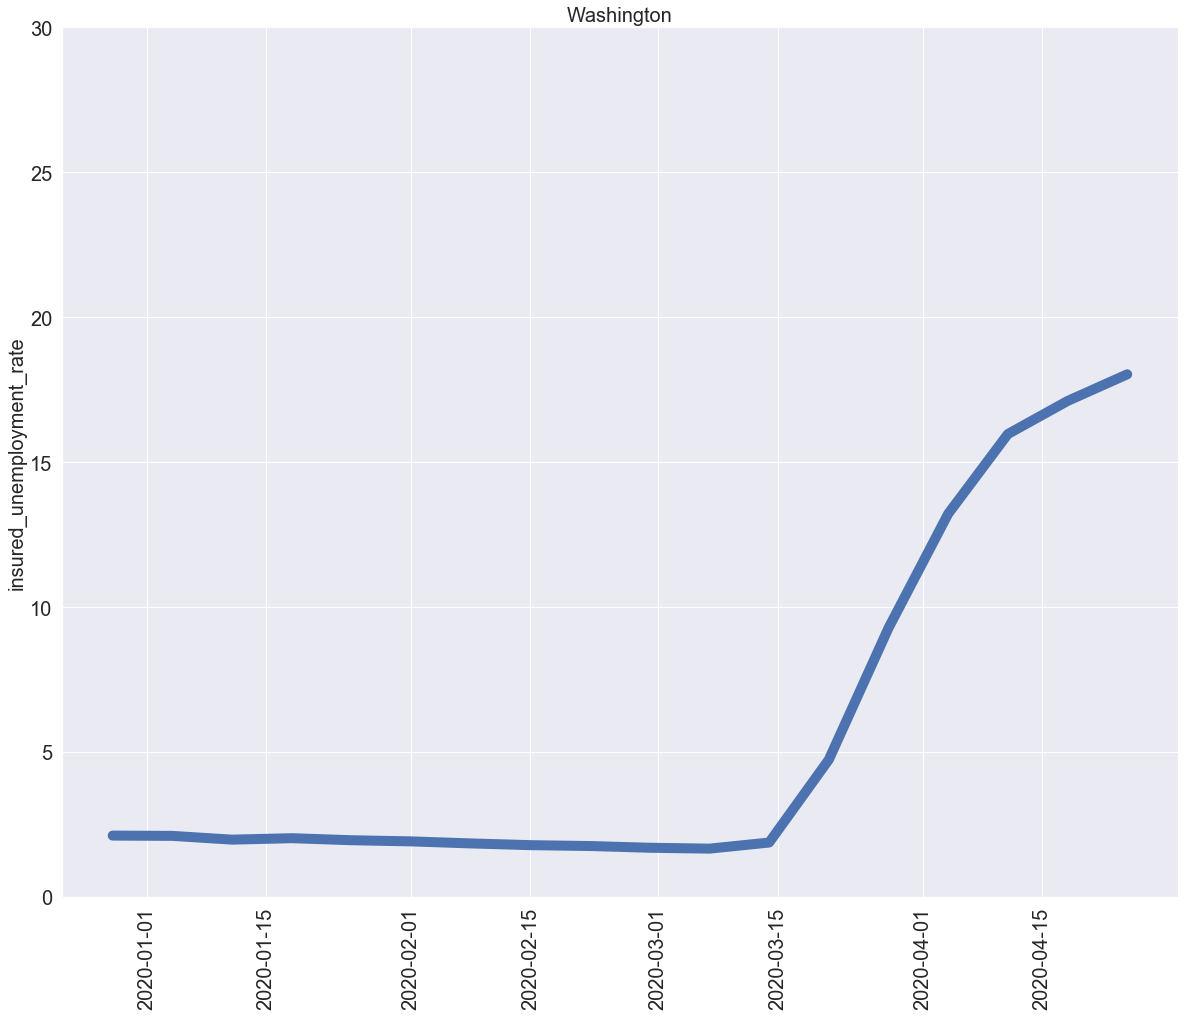

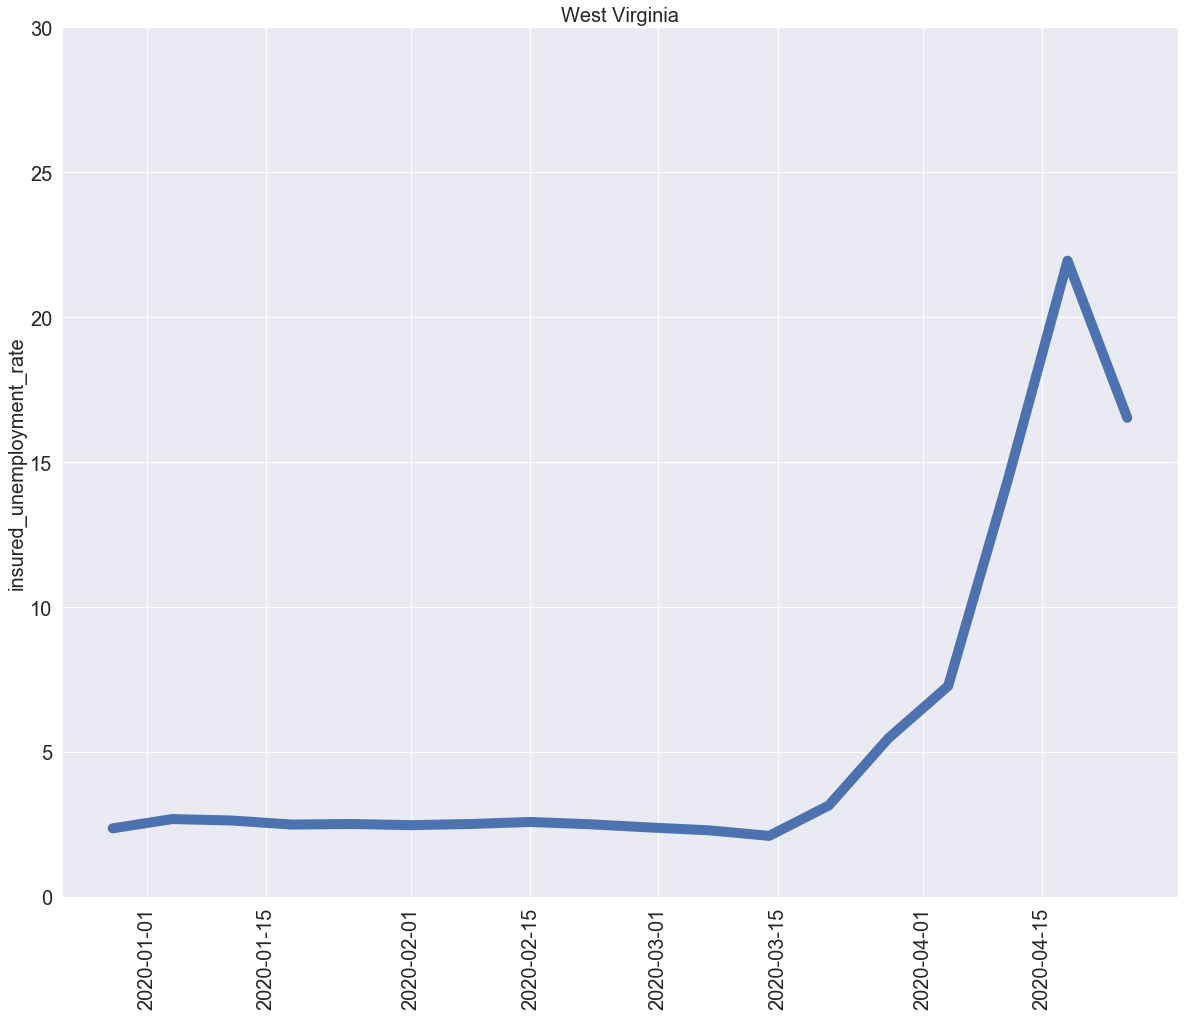

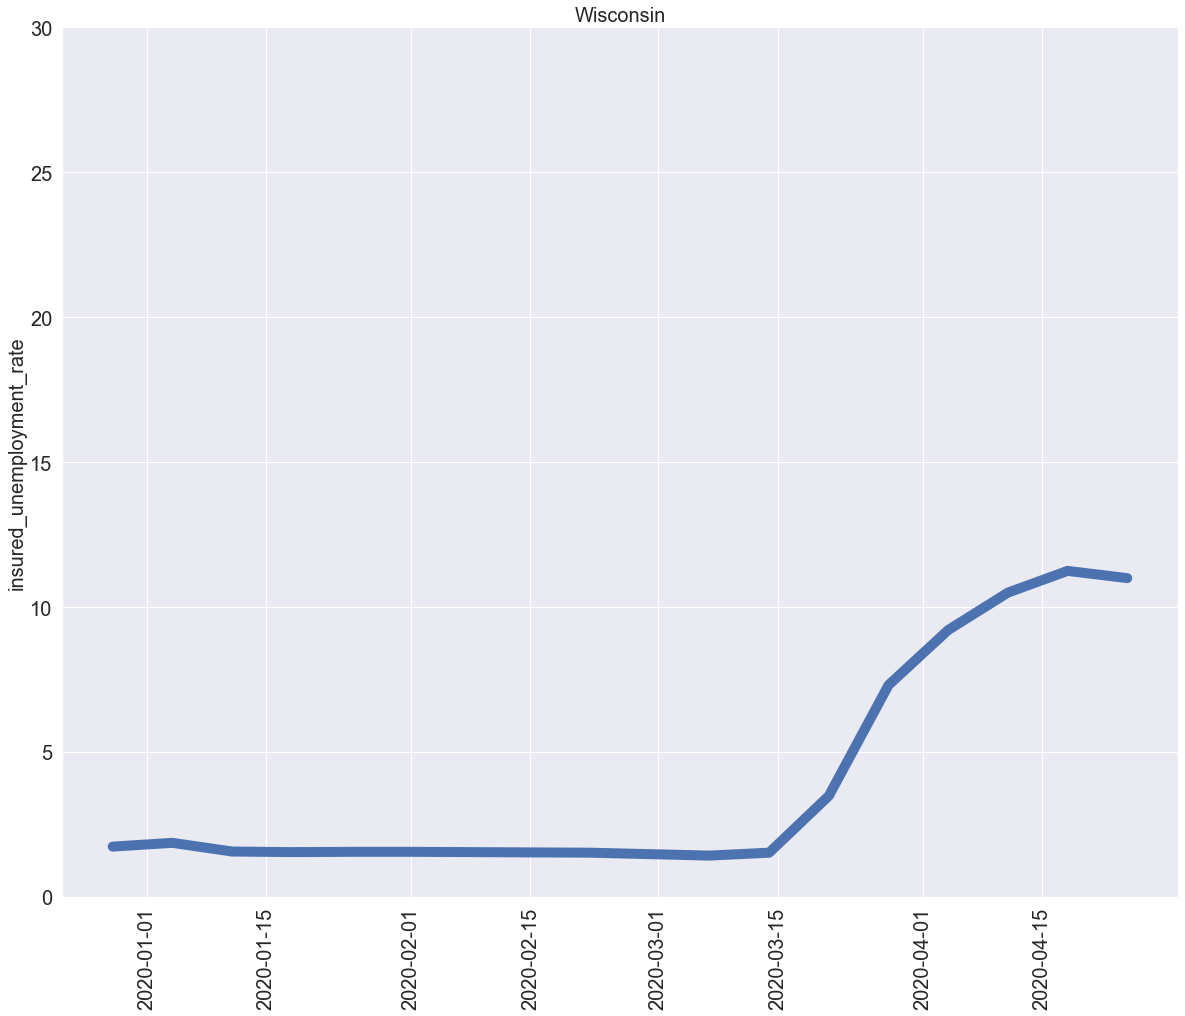

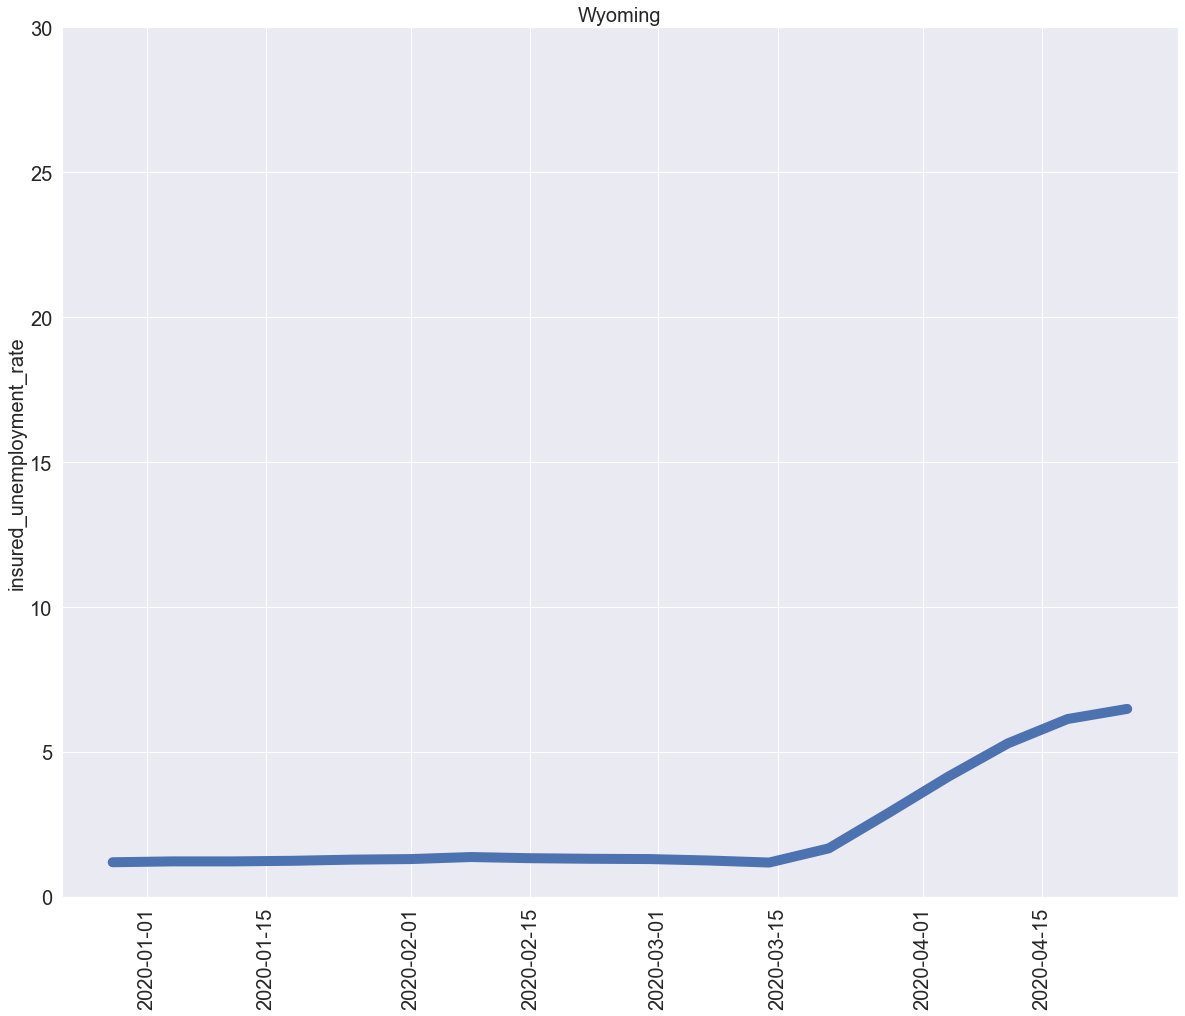

In [23]:
states = data['state'].unique()

for state in states:
    
    state_df = data[data['state'] == state]
    
#     make_plot(state_df, 'filed_week_ended', 'initial_claims', state)
    make_plot(state_df, 'reflecting_week_ended', 'insured_unemployment_rate', state)